# ❓ <font color='green'> <u> PROBLEM STATEMENT (Multi Linear Regression_Toyota_Corolla_Data) </u>

### Consider only the below columns and prepare a prediction model for predicting Price.

#### Corolla <- Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

* Price --> Offer Price in EUROs	
* Age_08_04 --> Age in months as in August 2004	
* KM --> Accumulated Kilometers on odometer
* HP --> Horse Power
* cc --> Cylinder Volume in cubic centimeters
* Doors --> Number of doors
* Gears --> Number of gear positions
* Quarterly_Tax --> Quarterly road tax in EUROs
* Weight --> Weight in Kilograms

***

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

* ### <font color = 'blue'> <u> READ DATA </u>

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Data_sets/main/ToyotaCorolla.csv', encoding='latin-1')
df.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

#### Select Variables Mensioned in Question

* "Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"

In [3]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
df = df[['Price', 'Age_08_04','KM','HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

<br>

* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <u>Data Summary</u>

In [5]:
df.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


* ##### <u>Missing Values Imputation if any</u>

In [7]:
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

#### Visualisation of Null Values 

<AxesSubplot:>

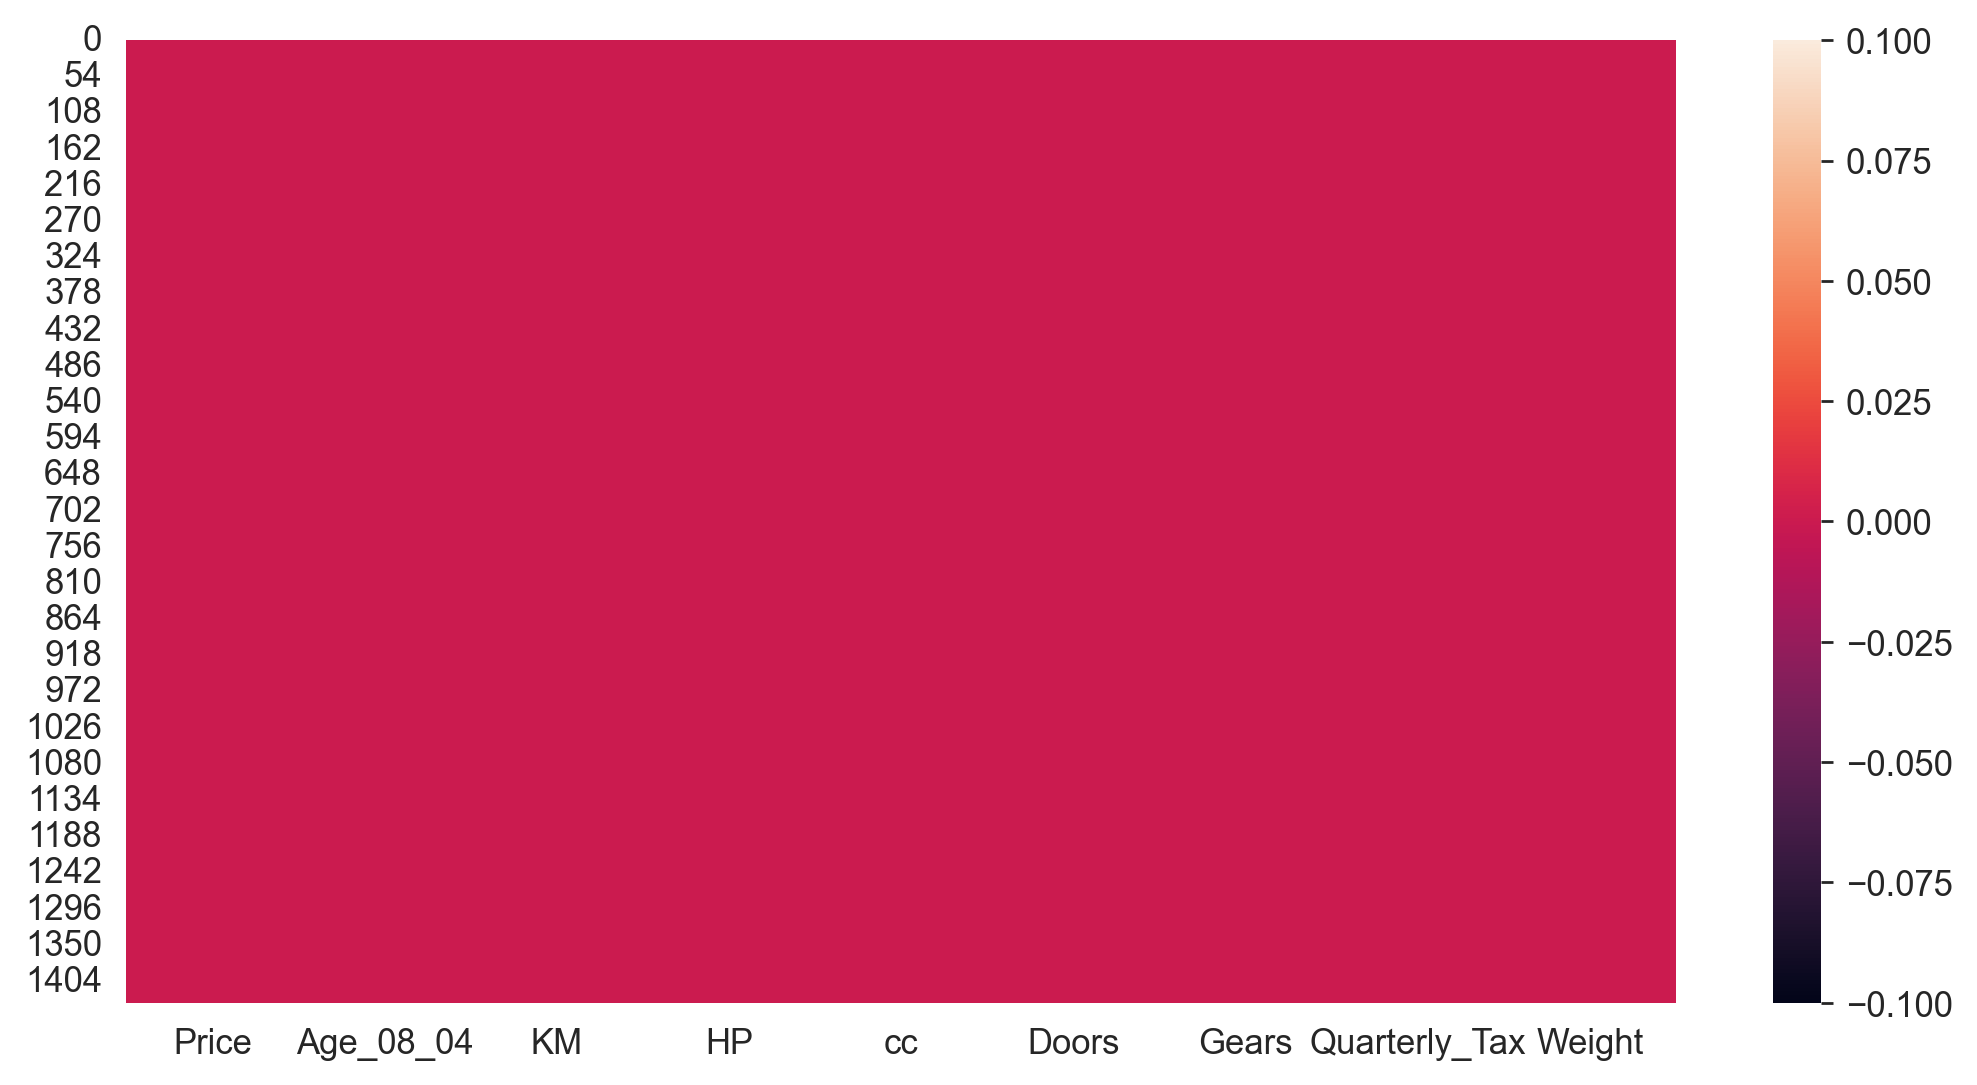

In [8]:
sns.heatmap(df.isna())

* ##### <u> Checking for Duplicate Records and Removing if any </u>

In [9]:
df.duplicated().sum()

1

In [10]:
df[df.duplicated()]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
113  24950          8  13253  116  2000      5      5            234    1320

In [11]:
df.shape

(1436, 9)

In [12]:
df[df.duplicated(keep = False)]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
112  24950          8  13253  116  2000      5      5            234    1320
113  24950          8  13253  116  2000      5      5            234    1320

In [13]:
df.drop_duplicates(inplace= True)

In [14]:
df[112:114]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
112  24950          8  13253  116  2000      5      5            234    1320
114  22950          7  10000  116  2000      5      5            234    1270

In [15]:
df.shape

(1435, 9)

In [16]:
df.duplicated().sum()

0

* ##### <u>Renaming Columns for ease of Use </u>

In [17]:
df.rename(columns= {'Age_08_04' : 'Age', 'Quarterly_Tax' : 'QT'}, inplace= True)

In [18]:
df.head()

Price  Age     KM  HP    cc  Doors  Gears   QT  Weight
0  13500   23  46986  90  2000      3      5  210    1165
1  13750   23  72937  90  2000      3      5  210    1165
2  13950   24  41711  90  2000      3      5  210    1165
3  14950   26  48000  90  2000      3      5  210    1165
4  13750   30  38500  90  2000      3      5  210    1170

* ##### <u> Let's Check For Unique Values </u>

In [19]:
df['Doors'].unique()

array([3, 5, 4, 2], dtype=int64)

In [20]:
df['Gears'].unique()

array([5, 6, 3, 4], dtype=int64)

In [21]:
df['HP'].unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

In [22]:
df['QT'].unique()

array([210, 100, 185,  85,  19, 234,  69, 283,  64, 197, 163,  72,  40],
      dtype=int64)

In [23]:
print(f'Maximum Value for Age is:', df['Age'].max())

Maximum Value for Age is: 80


> * ##### All Variables have relevant data-type. 
> * ##### No Missing Values found.
> * ##### There were one duplicate record which is removed now.
> * ##### From Descriptive Statistics we can see the presence of Outliers.

<br>

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

* ##### <u>Boxplot</u>

<AxesSubplot:>

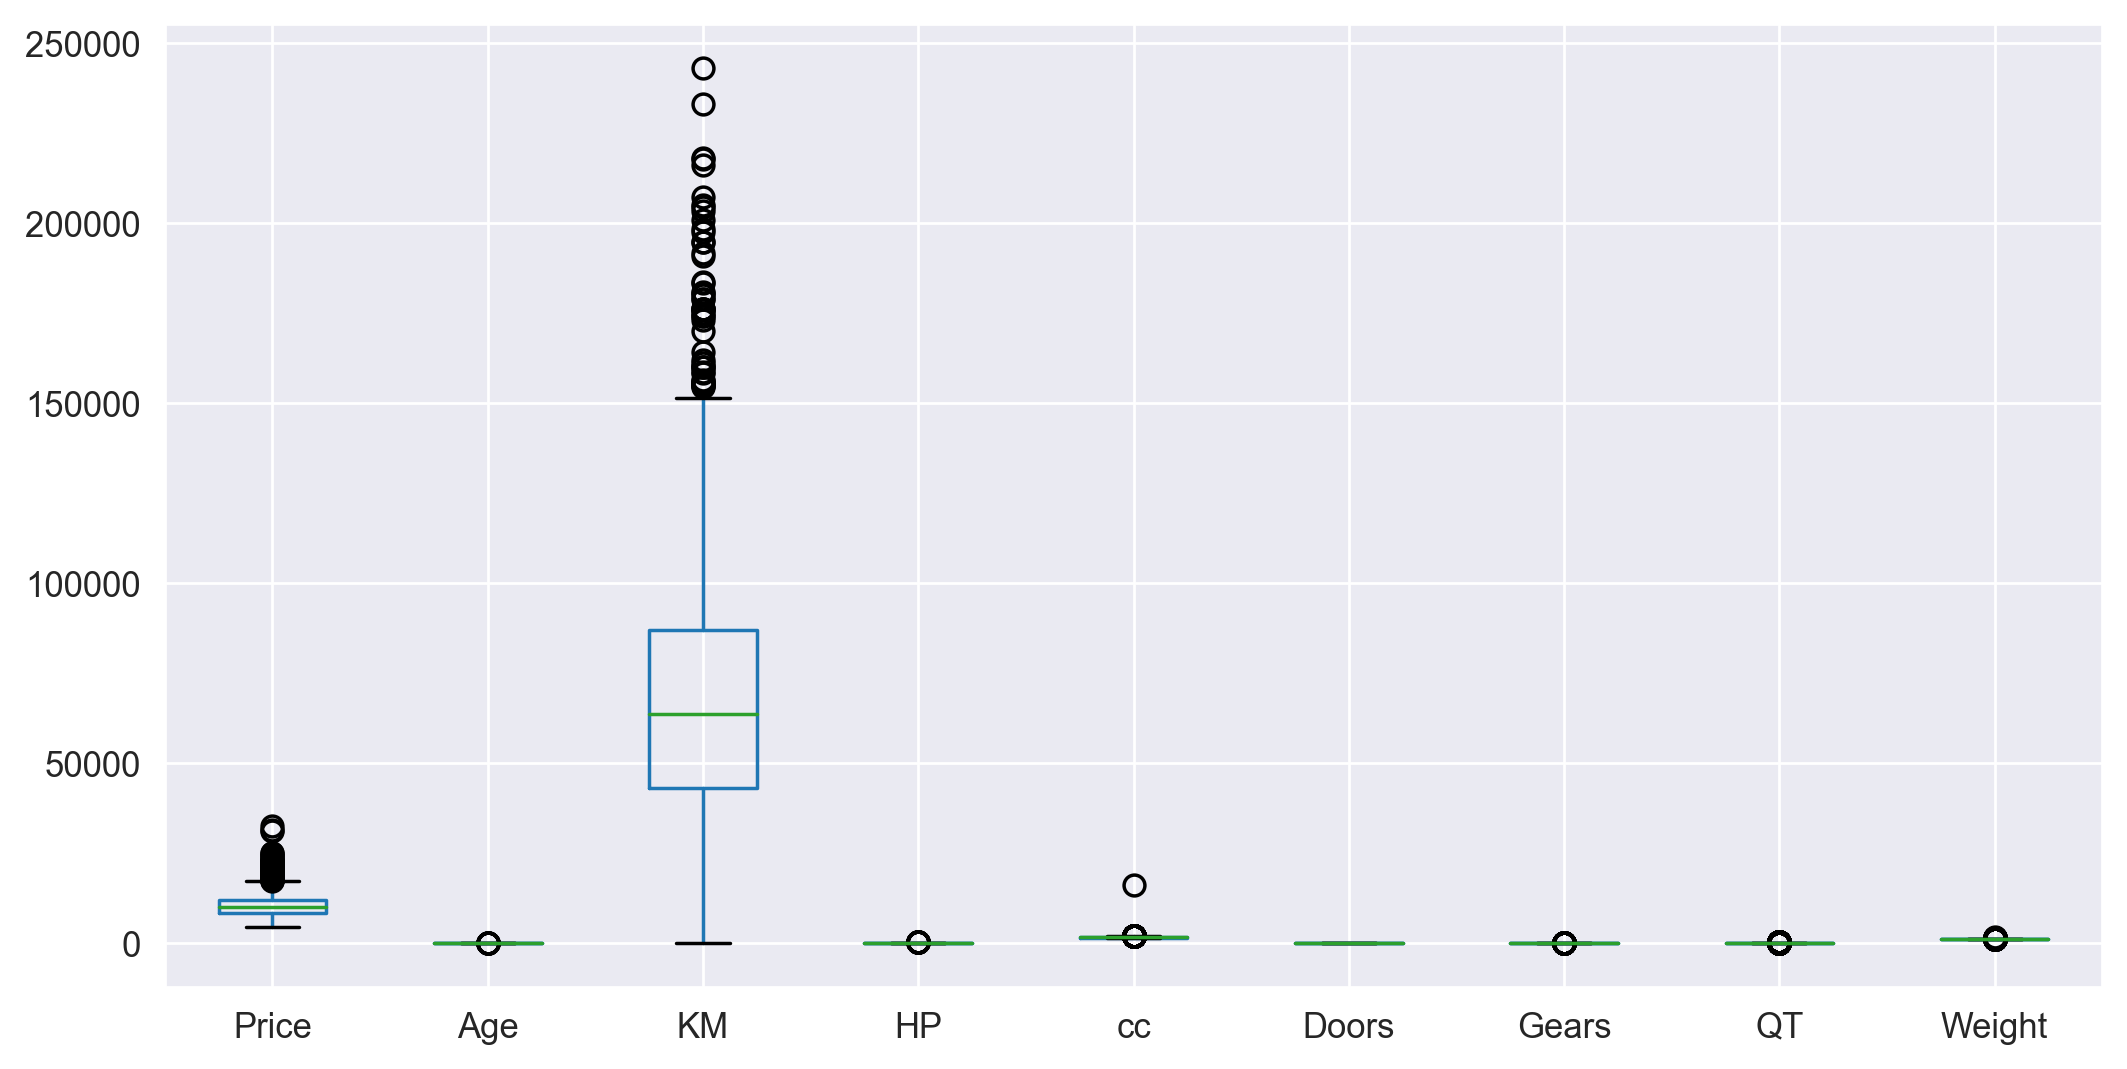

In [24]:
df.boxplot()

* #####  <u>Boxplot for Continuous Data Variables</u>  

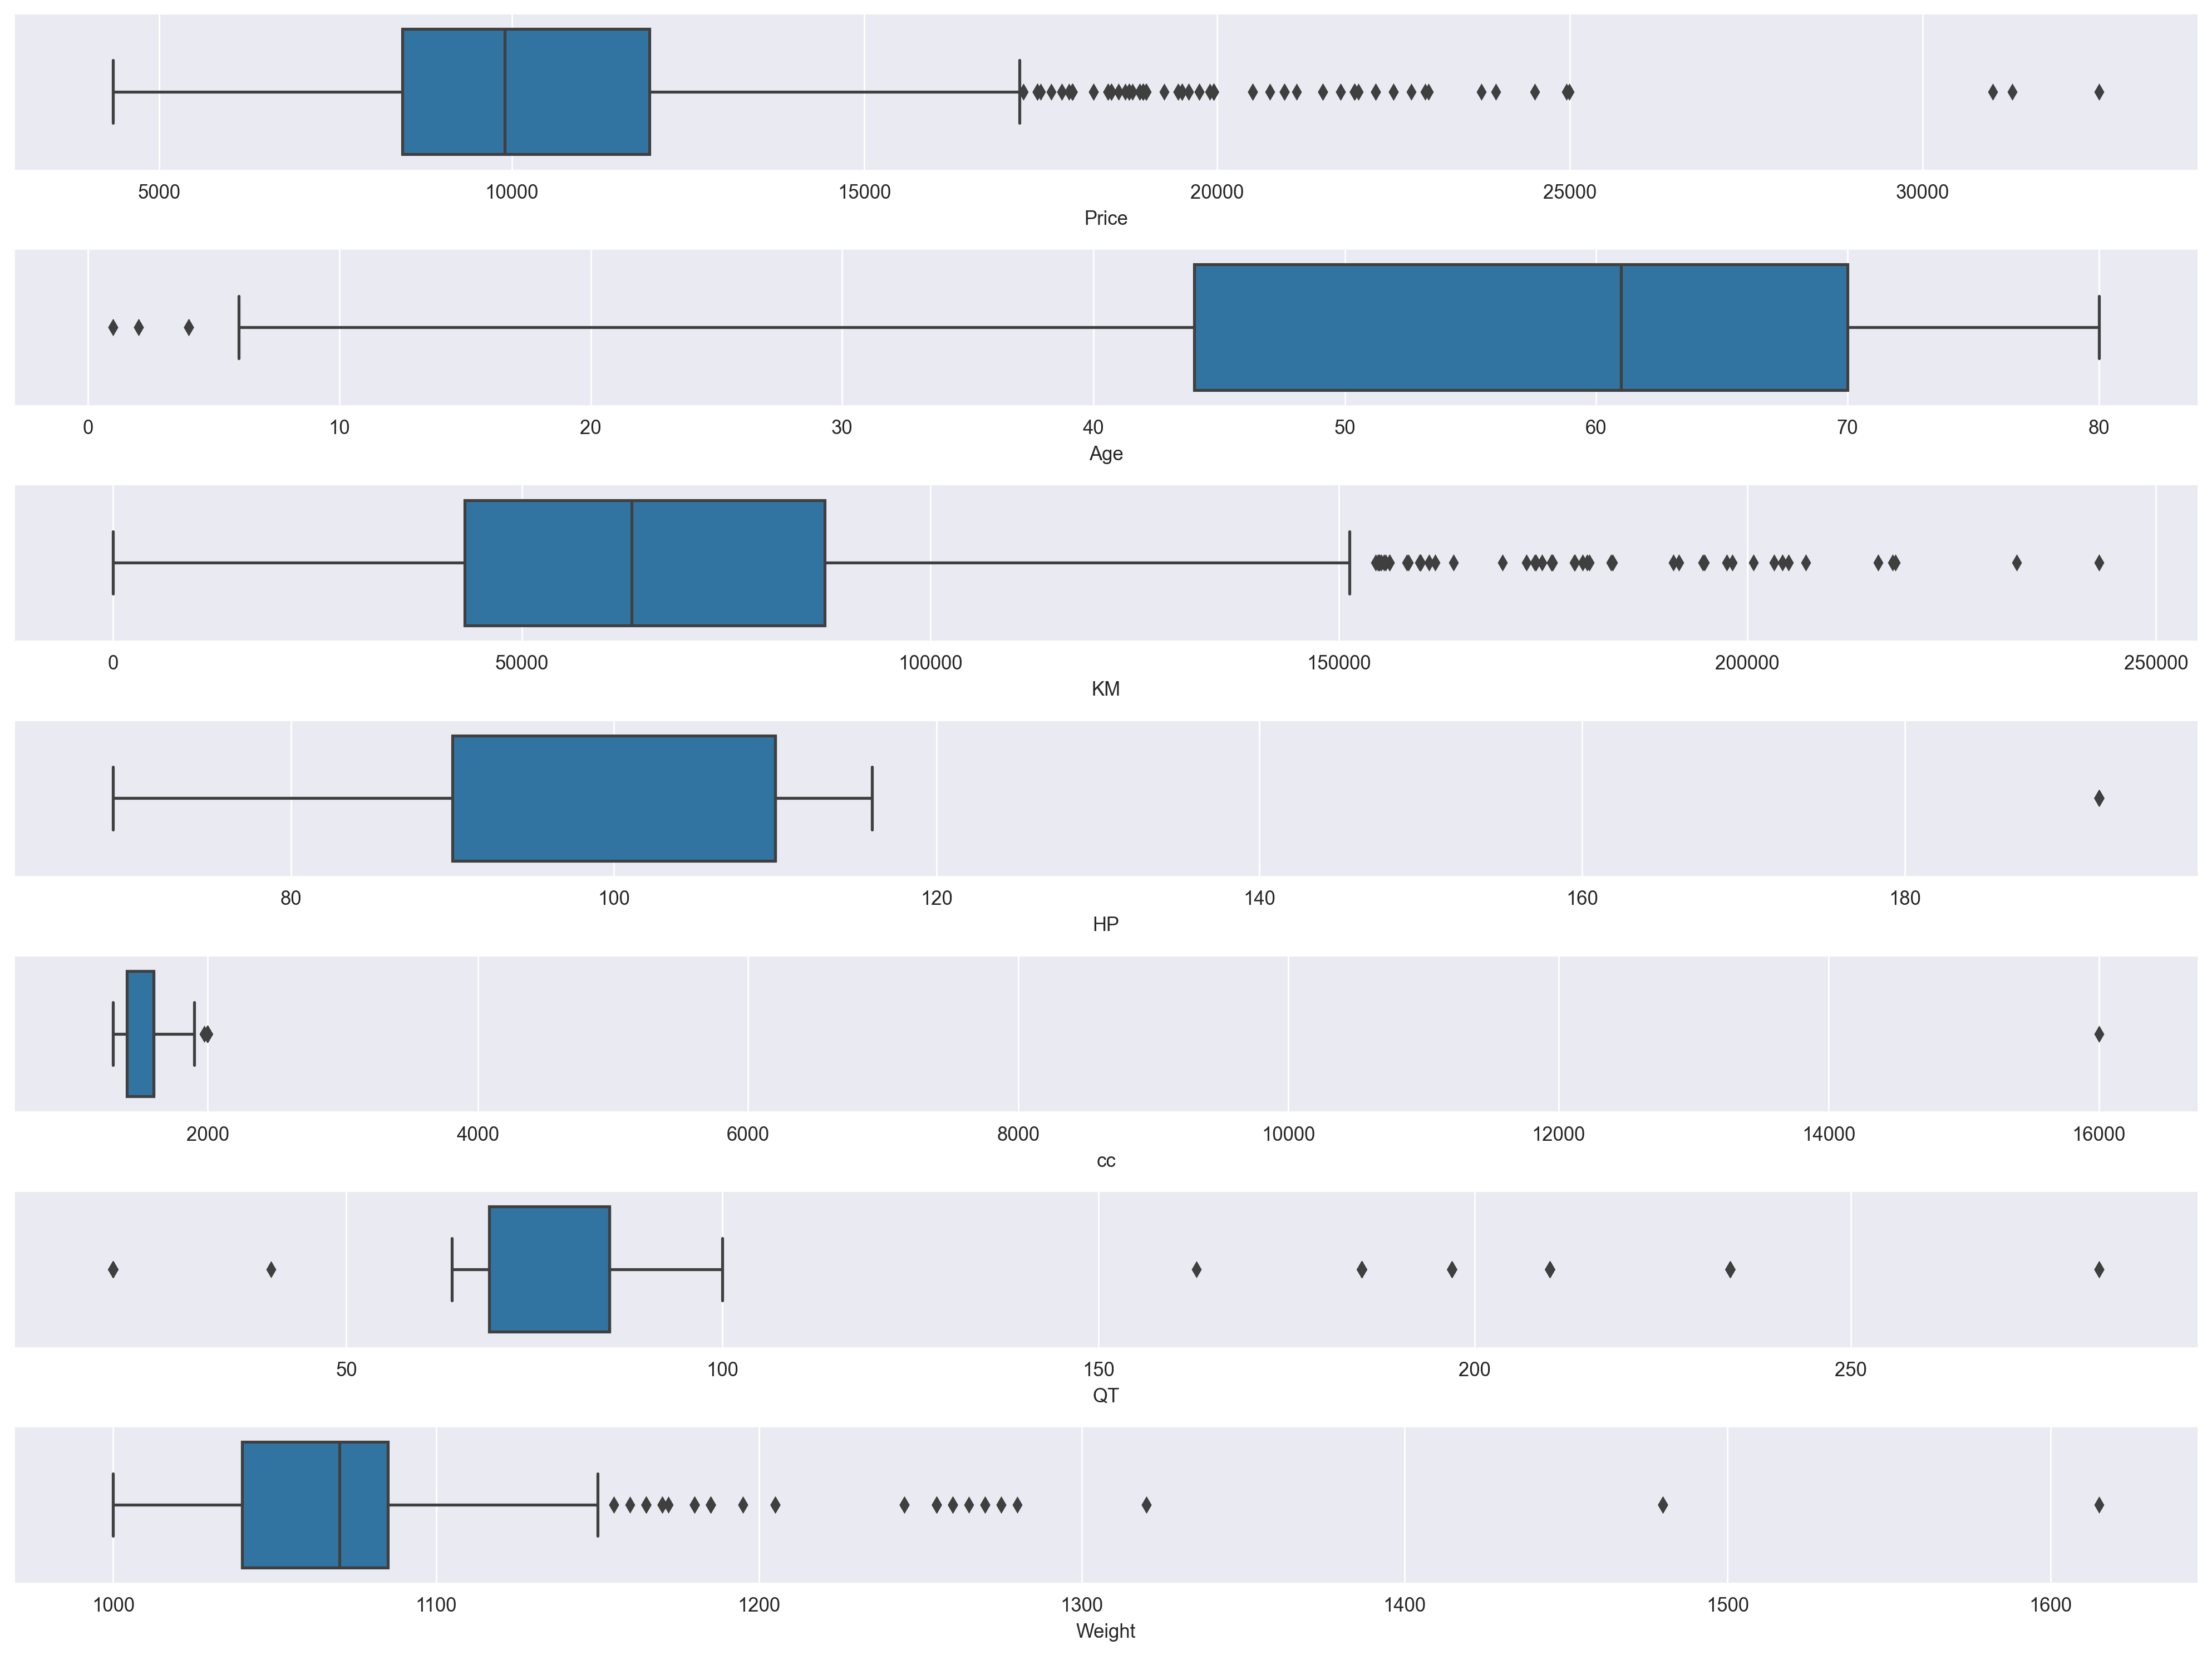

In [25]:
fig, index = plt.subplots(7,1, figsize= (16,12))

sns.boxplot(df['Price'], ax= index[0])

sns.boxplot(df['Age'], ax= index[1])

sns.boxplot(df['KM'], ax= index[2])

sns.boxplot(df['HP'], ax= index[3])

sns.boxplot(df['cc'], ax= index[4])

sns.boxplot(df['QT'], ax= index[5])

sns.boxplot(df['Weight'], ax= index[6])

plt.tight_layout()

> *  #### We can see there are presence of Outlier Data Points in many variables but we are not going to remove them at this stage
> * #### Cause all the Outliers are not Influencers.
> * #### Influencer Data Points are those data points which cause to deviate <u> Linear Regression Line </u> from its actual  position with respect to normal range of data.


* #####  <u>Histogram for Continuous Data Variable </u>

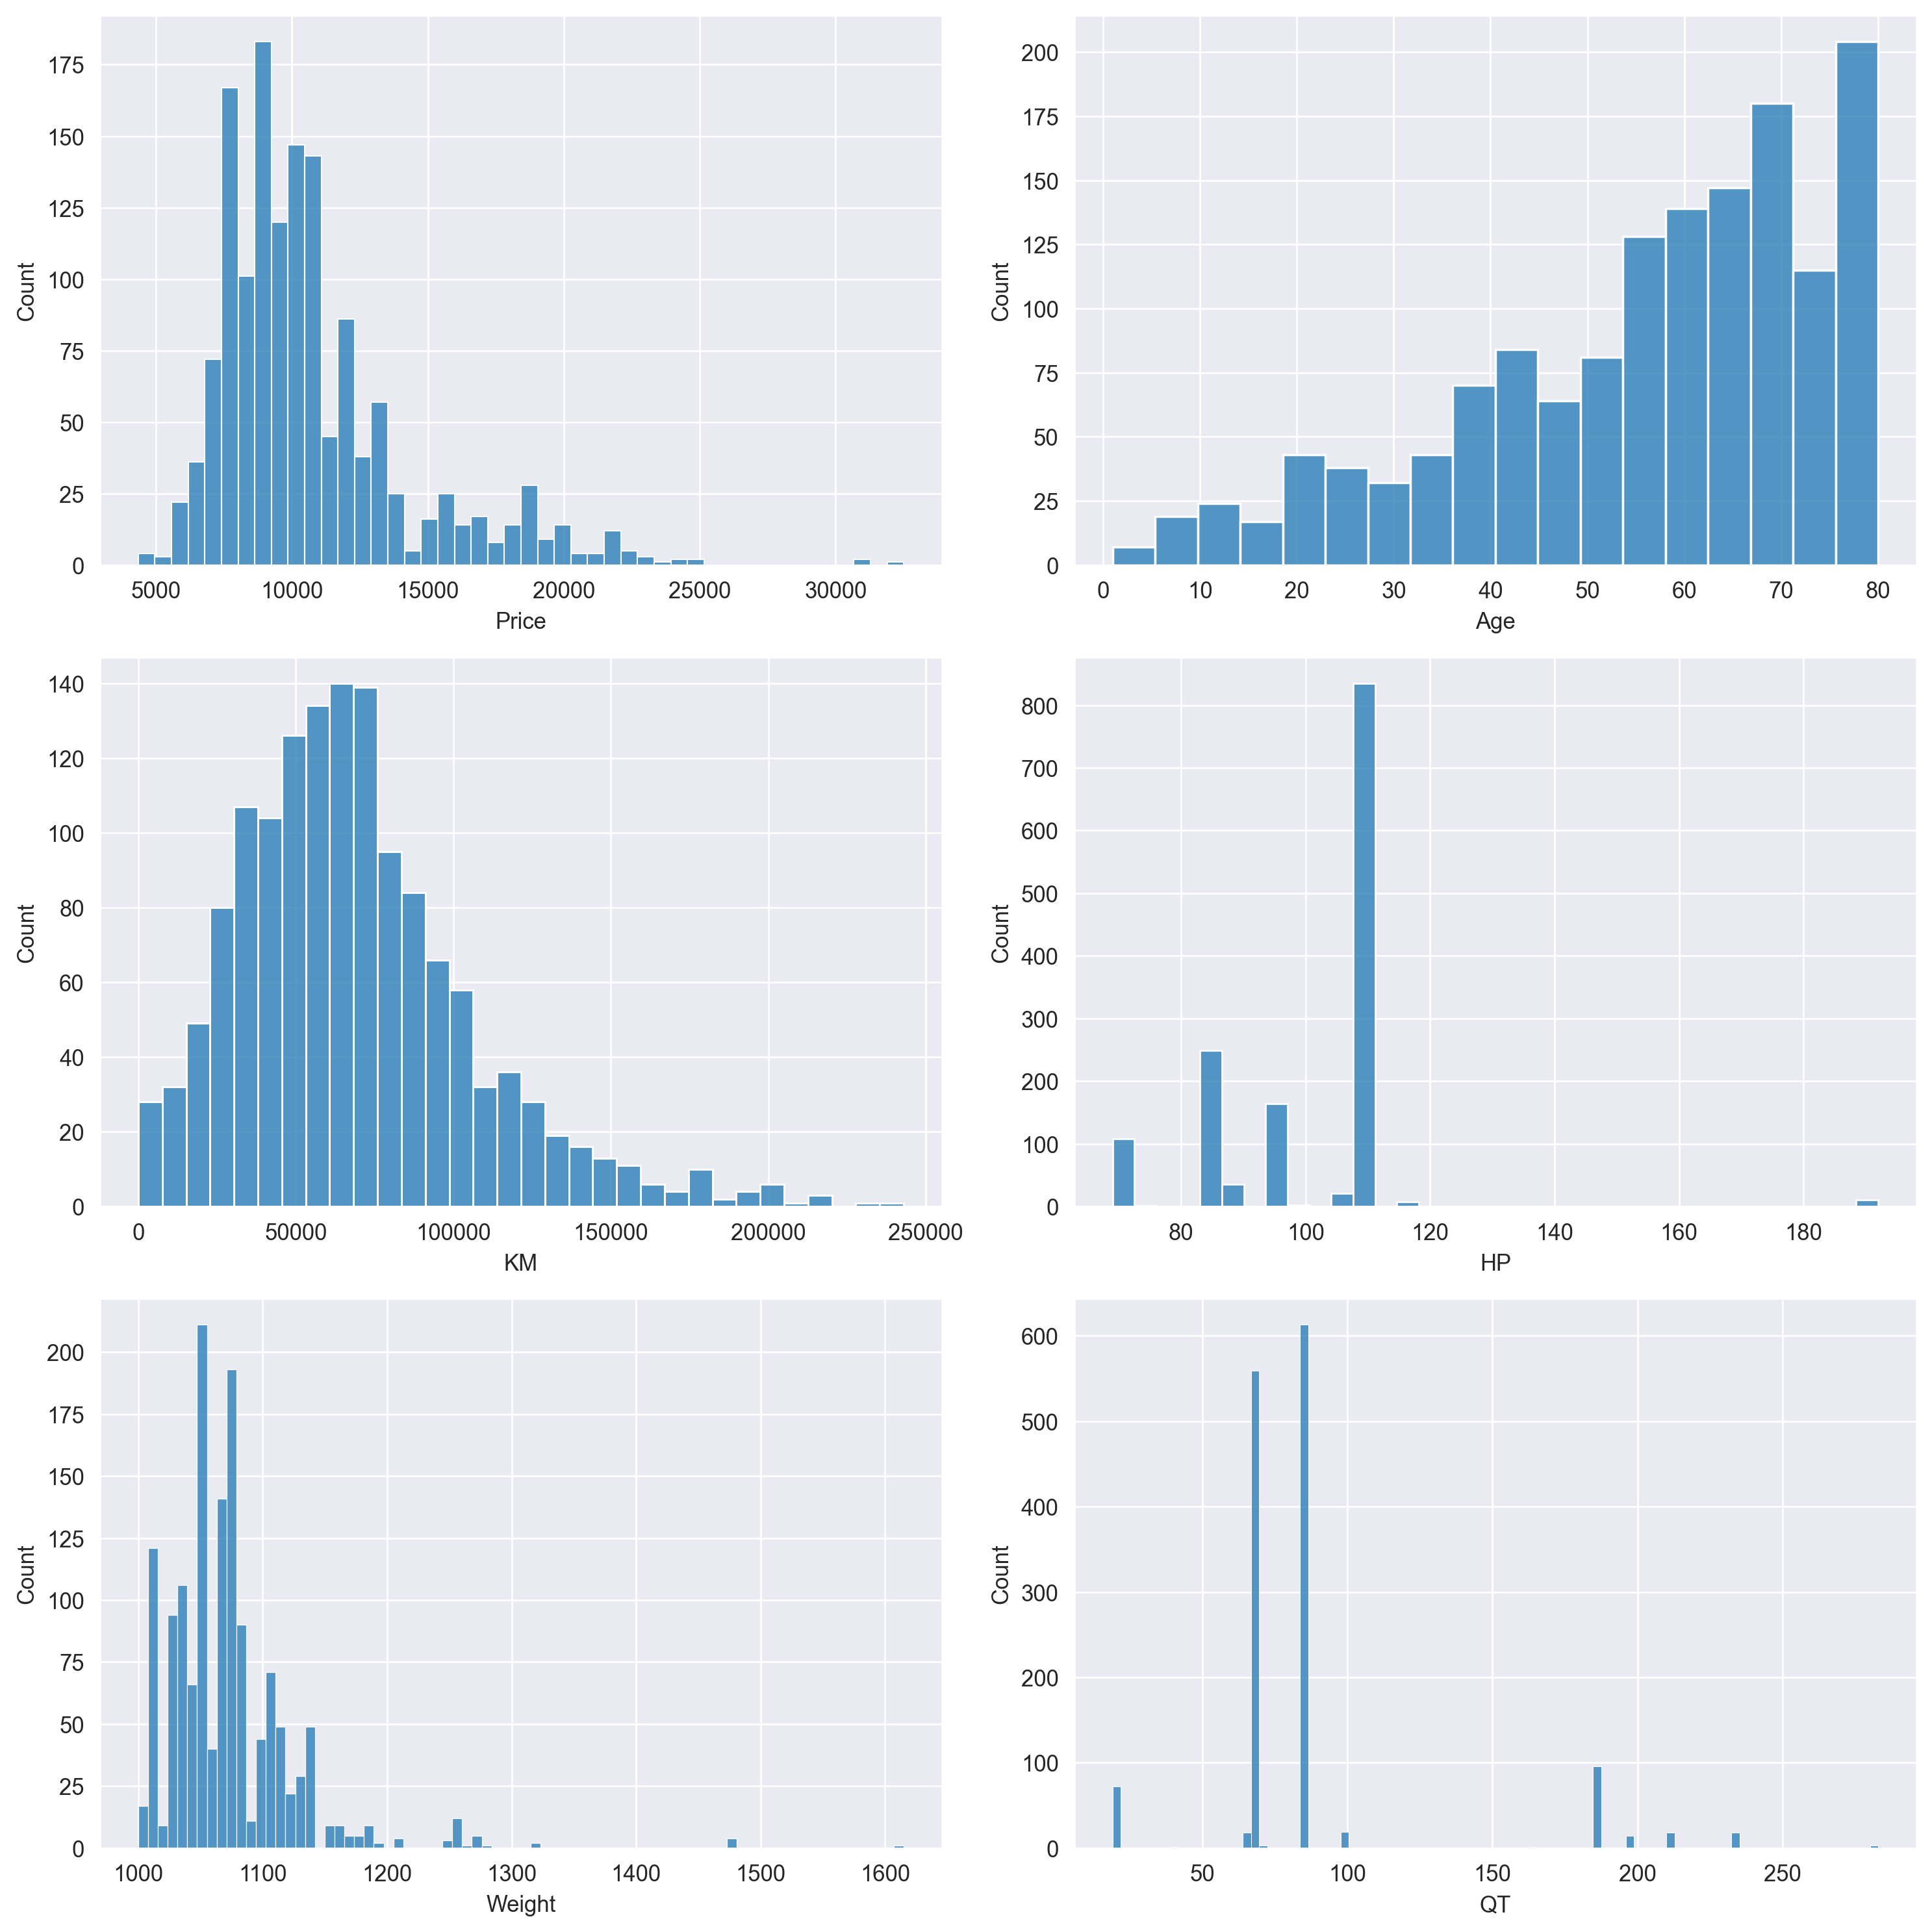

In [26]:
fig, index = plt.subplots(3,2, figsize= (12,12))

sns.histplot(df['Price'], ax = index[0,0])

sns.histplot(df['Age'], ax = index[0,1])

sns.histplot(df['KM'], ax = index[1,0])

sns.histplot(df['HP'], ax = index[1,1])

sns.histplot(df['Weight'], ax= index[2,0])

sns.histplot(df['QT'], ax= index[2,1])

plt.tight_layout()


<AxesSubplot:xlabel='cc', ylabel='Count'>

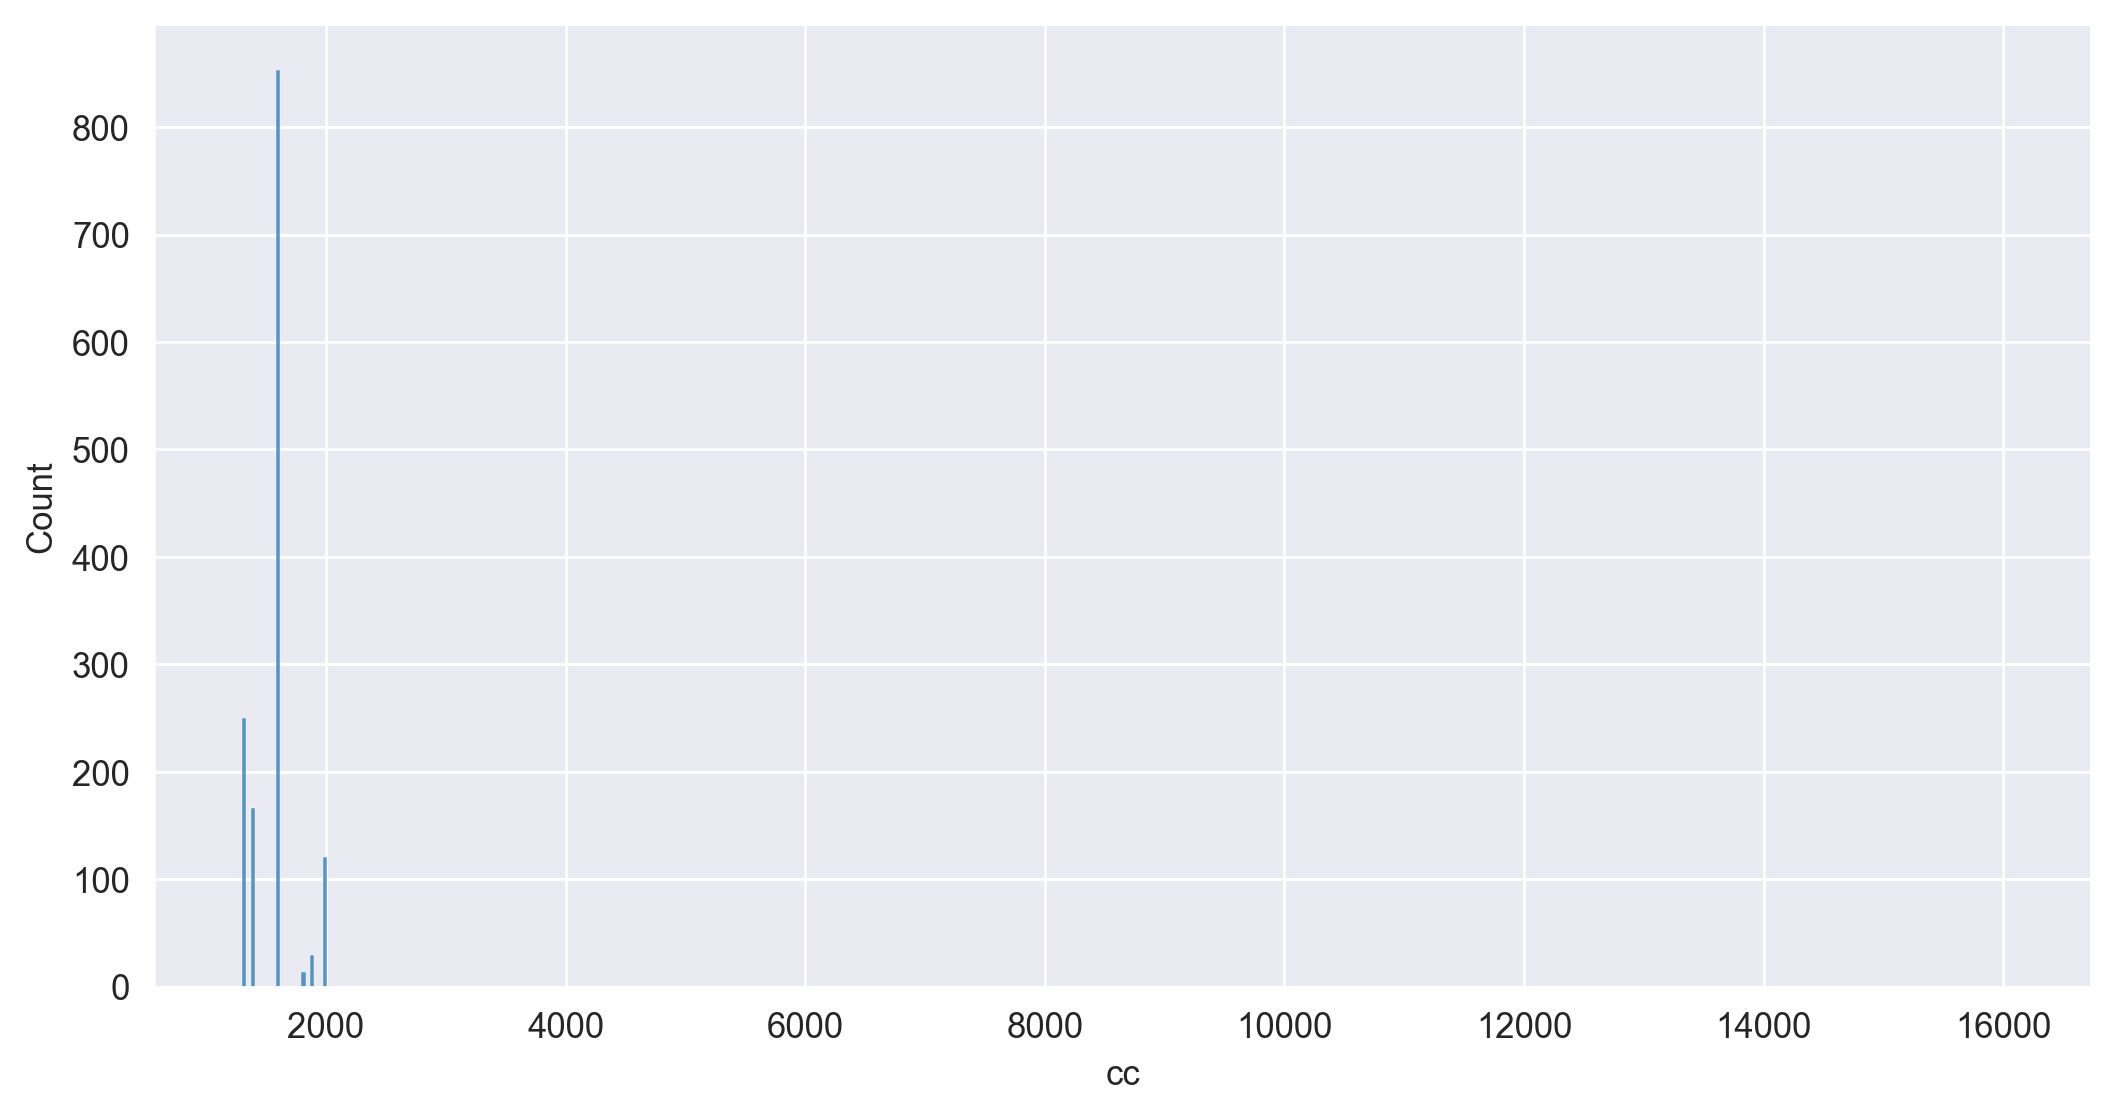

In [27]:
sns.histplot(df['cc'])

> * #### Skewness : All other variables except "Age" have positive skewness, where "Age" Variable have Negative skewness.

* ##### <u> Count Plot For Discrete Data </u>

<AxesSubplot:xlabel='Gears', ylabel='count'>

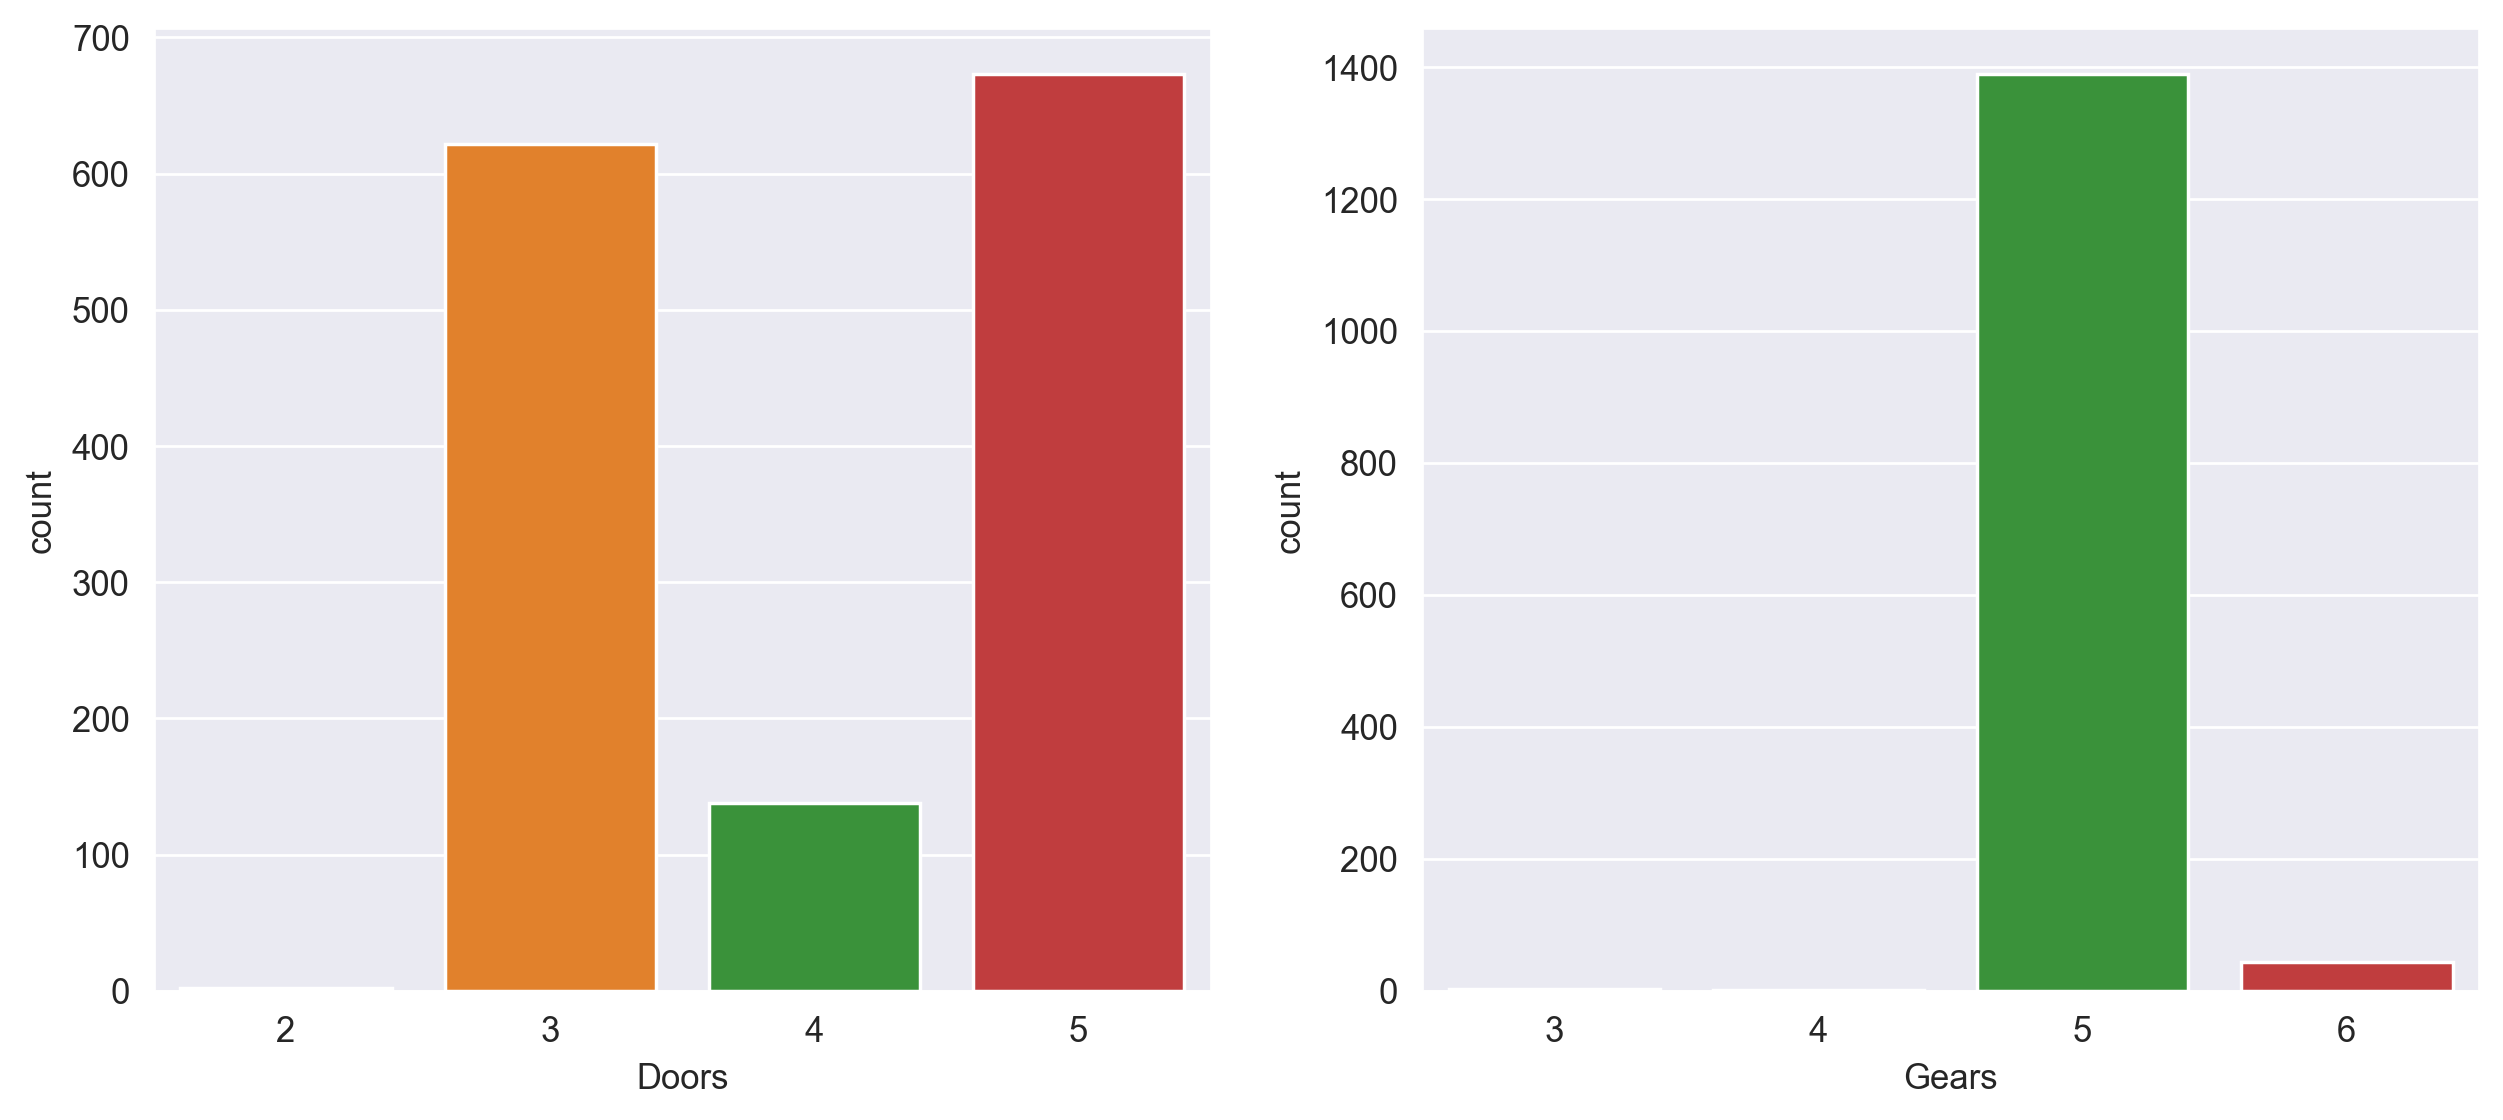

In [28]:
fig, index = plt.subplots(1,2, figsize= (12,5))
sns.countplot(df['Doors'], ax = index[0])
sns.countplot(df['Gears'], ax = index[1])

<br>

* ### <font color = 'blue'> <b><u> CORRELATION ANALYSIS </u></b>

### Let's Check Correlation and  Multicolinearity 
- #### Is there any relation between Independent Variables themselves and relation between Each Independent Variable with Dependent Variable ("Price")
- #### <u>Assumptions about Predictors</u> : 1. Independent Variables should non-ramdom 2. Linearly independent to each other. 

* ##### <U>Scatterplot</U>

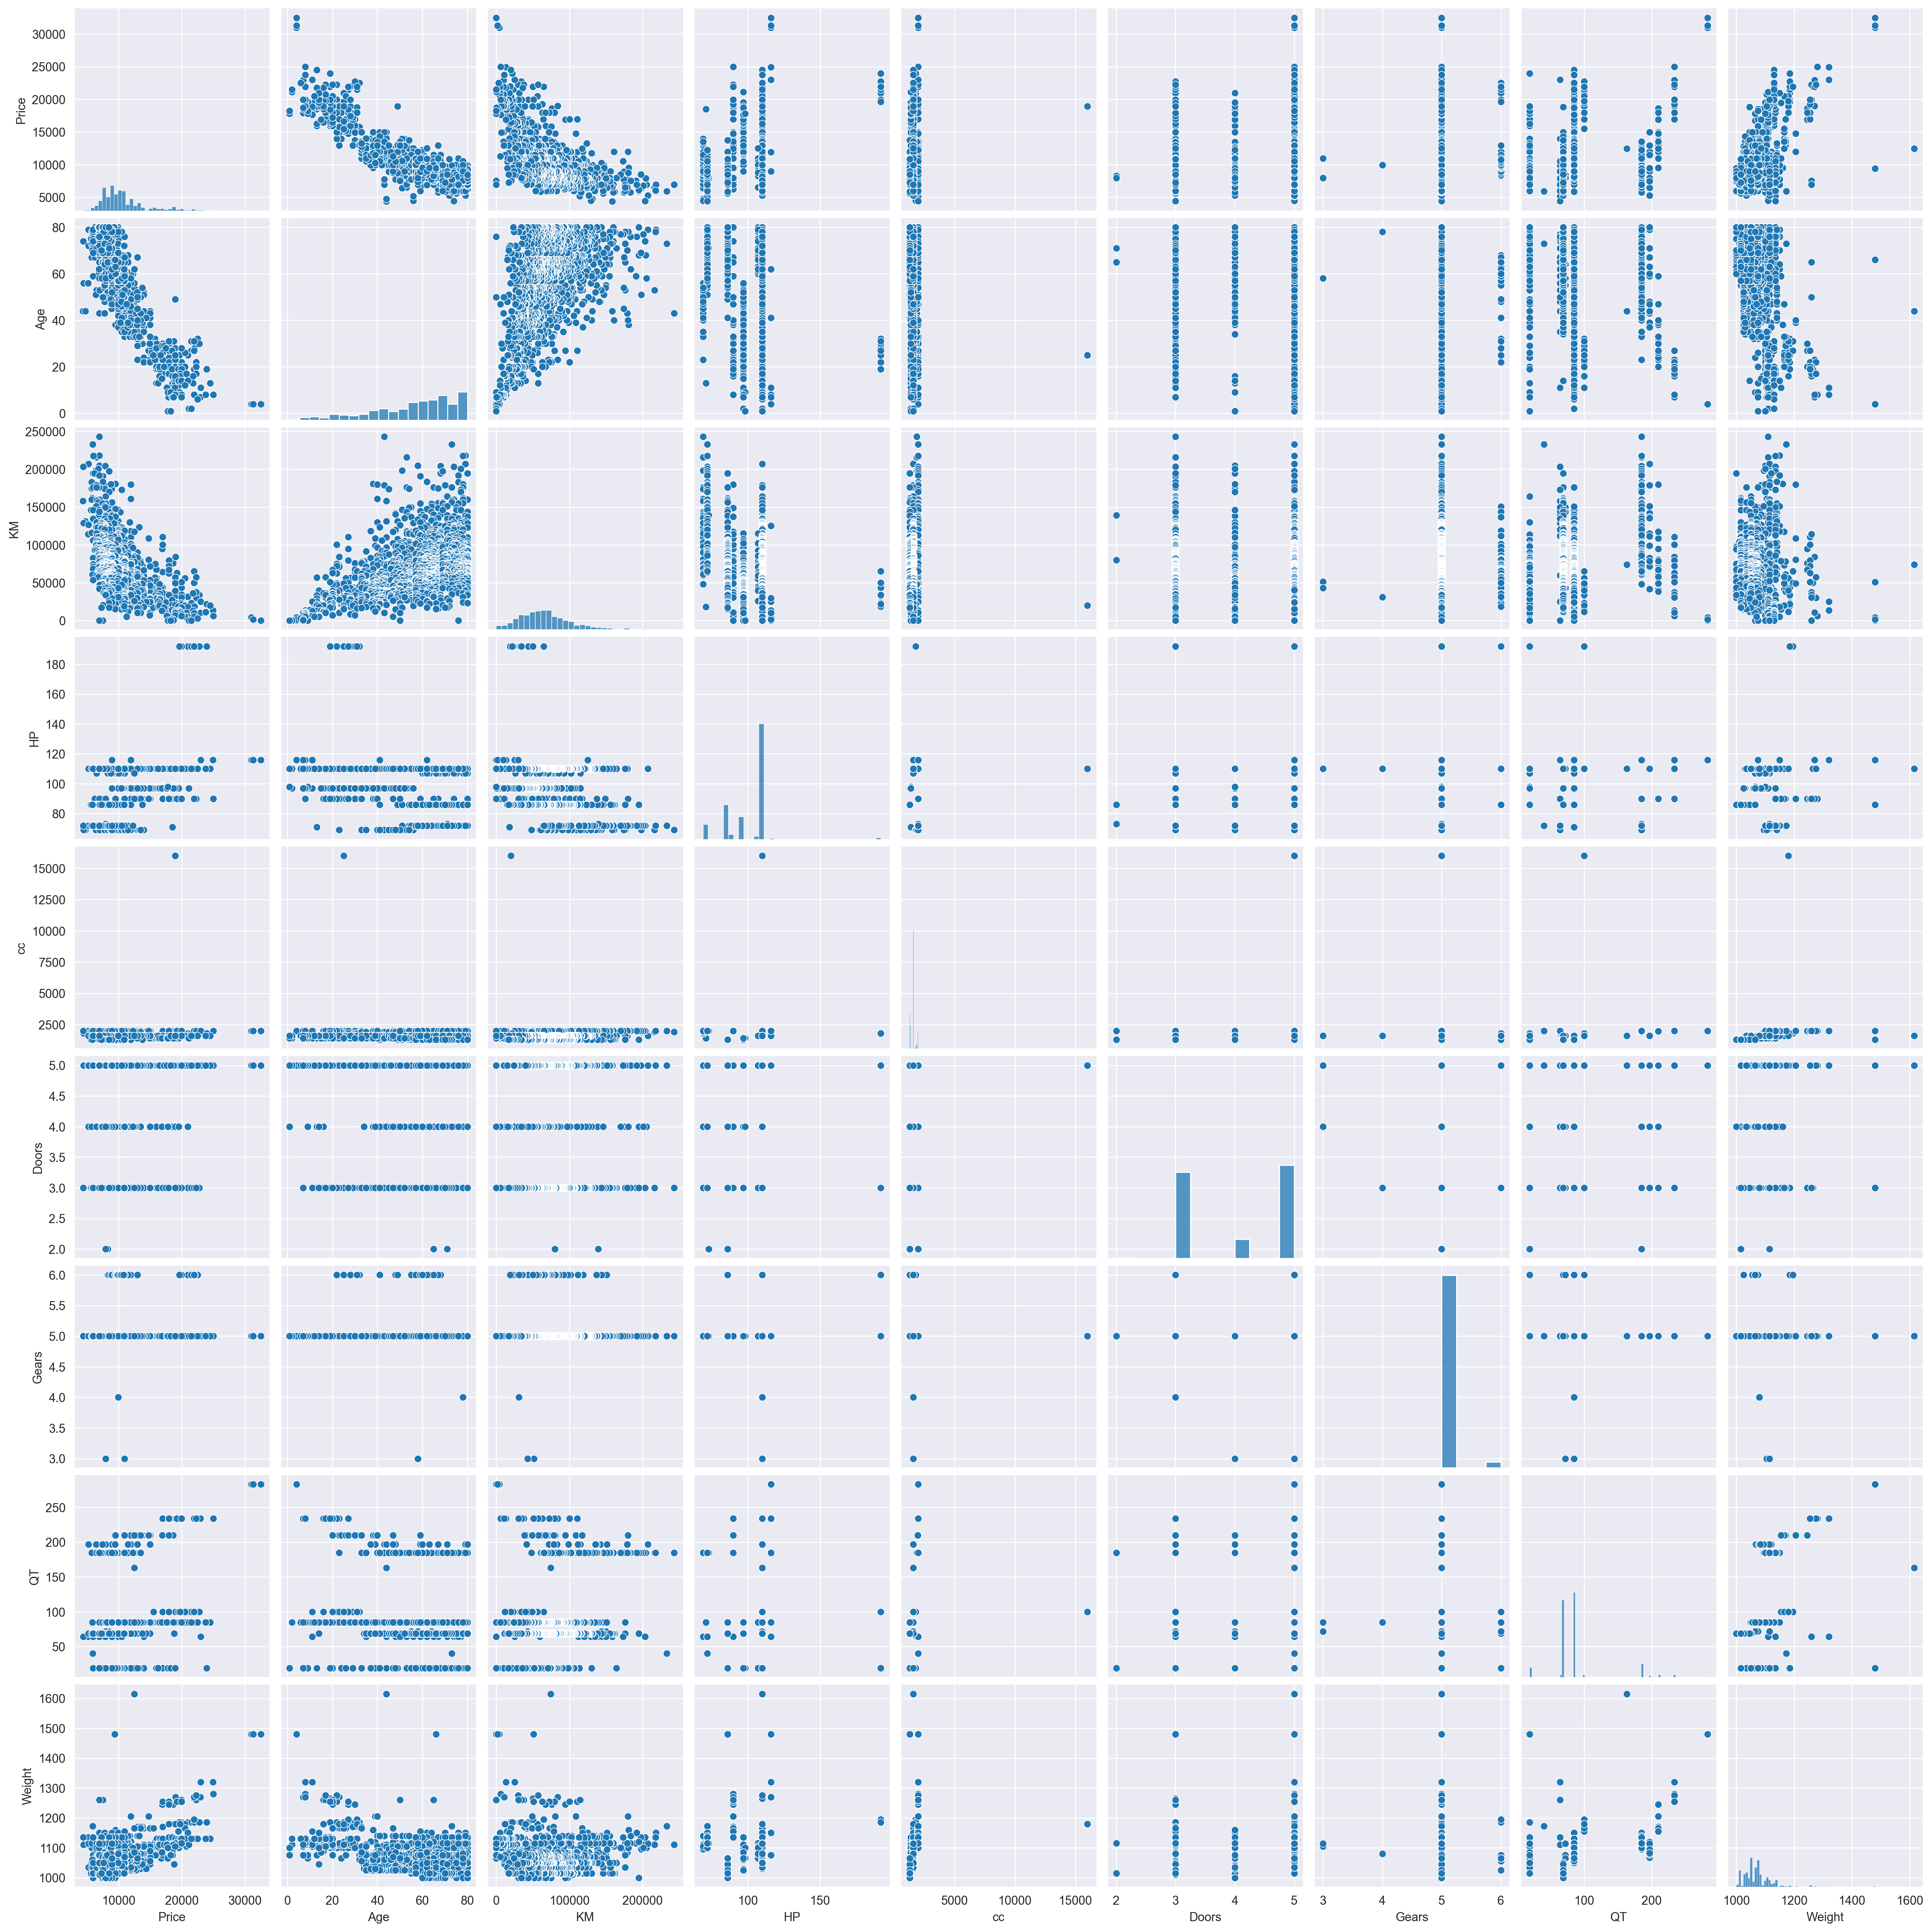

In [29]:
sns.pairplot(df)

> * #### Here in Pairplot we can clearly see correlation of our target variable "Price" with idependent variables "Age","Km" and "weight".
> *  #### And there might be presence of some trend between Independent Variables "Weight" and "KM" and between "Age" and "KM", we can confirm it with computing correlation value.
> *  #### Also to get correlation value for other variables with our target variable let's go for Correlation Matrix.

<br>

* ##### <U>Correlation Matrix</U>

<AxesSubplot:>

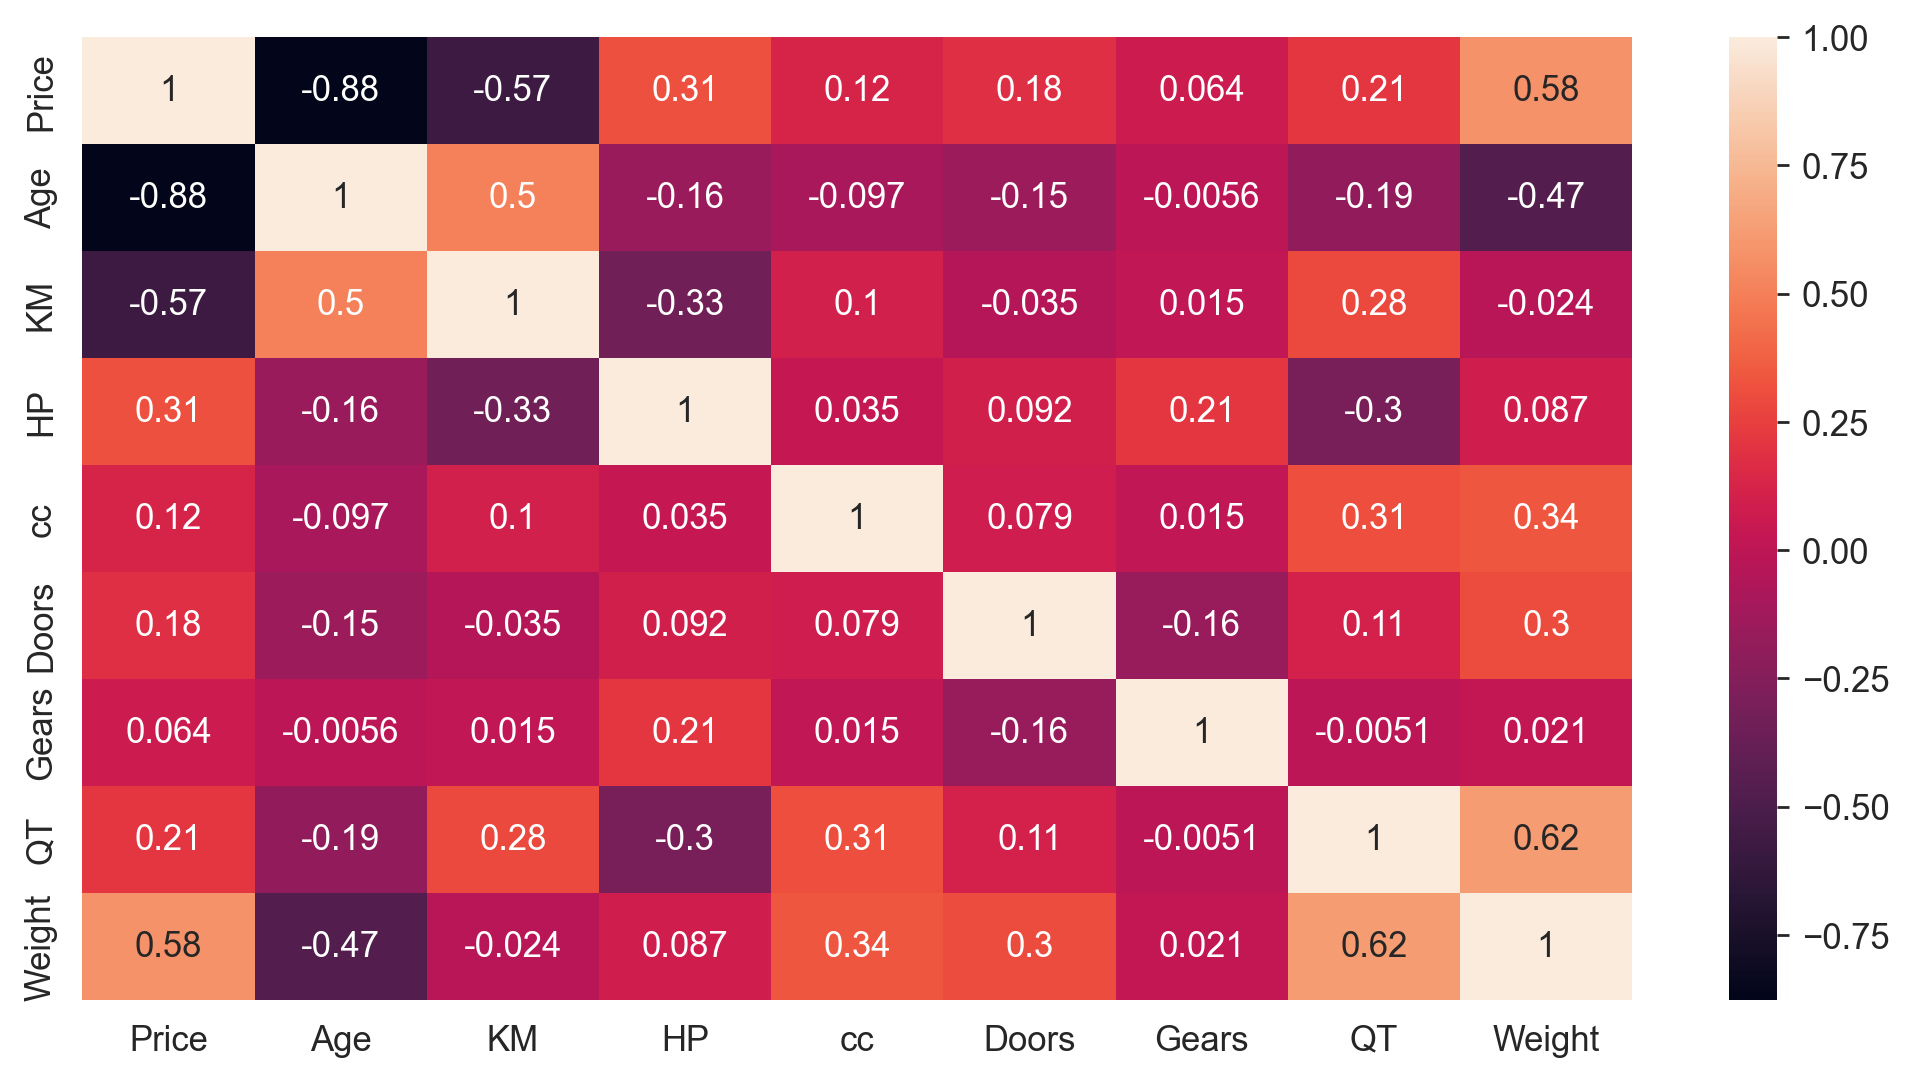

In [30]:
sns.heatmap(df.corr(), annot=True)

> * #### Here we can see only "Age", "KM" and "Weight" Variables have some good amount of correlation with our target variable.
> * #### Independent variables "weight" and "QT" have Moderate Correlation, same case with "Age" and "weight" Variable.

* ### <font color = 'blue'> <u> DETECTION OF MULTICOLLINEARITY </u>

* ##### <u>With P-Value </u>

  #### Let's Build Model With Considering all Independent variable (model_1)

In [31]:
import statsmodels.formula.api as smf

In [32]:
model_1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight', data= df).fit()

In [33]:
model_1.pvalues

Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
cc            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64

> * #### Here we got Intercept value and p-values of Slope for best fit line, i.e. Regression Line of target and predictors.
> * #### p-values are probability values for Hypothesis Test, if any independent variable contributing to target variable must have some slope value. 
> * #### Here Null Hypothesis is slope = 0 and Alternate Hypothesis is Slope ≠ 0  
> * #### When p-value is less than alpha value i.e. 0.05  then we reject Null Hypothesis, that implies there is relationship between our target variable and independent variable.
> * #### Also we check Multicollinearity of any two independent variables by their p-values if they are more than alpha but in  correlation analysis we see there is relation with target variable then such independent variables must have Multicollinearity between them.
> * #### In this case "Doors" and "cc" have p-values more than alpha. But as per correlation analysis they are not much contributing to our target column "Price".
> * #### For more clearity let's try Variance Inflation Factor for Detecting Multicollinearity.

<br>

* ##### <U>Calculating VIF (Variance Inflation Factor)</U>

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vif = pd.DataFrame()

vif['VIF_value'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]

vif['Variables'] = df.columns

In [36]:
vif

VIF_value Variables
0   70.770259     Price
1   46.662057       Age
2    9.005938        KM
3   71.361440        HP
4   17.201048        cc
5   21.856498     Doors
6  439.792421     Gears
7   11.187125        QT
8  668.038614    Weight

> * #### Negelcting Target Column "Price" we compare all other VIF Values of Independent Variables. If VIF values are near to each other then those independent variables have Multicollinearity Problem.
> * #### In correlation analysis we found "Age" and "Weight" have Moderate correlation i.e. -0.47 but here both have huge difference in VIF Values.
> * #### Also we seen 62% correlation between "Weight" and "QT" but there VIF Values are not close to each other.
> * #### So, We can conclude that independent variables haven't any Multicollinearity issue within themselves.

<br>

* ### <font color = 'blue'> <u> SUBSET SELECTION </u>

> * ##### We seen above in Correlation Analysis only "Age","KM" and "Weight" have Moderate to good amount of correlation with "Price". So, Let's Build the Model with these Variables only.

  #### Model With Considering Independent variable "Age","KM" and "Weight" (model_2)

In [37]:
model_2 = smf.ols('Price~Age+KM+Weight', data= df).fit()

In [38]:
model_2.rsquared,model_2.rsquared

(0.8467399730874641, 0.8467399730874641)

#### Let's compare accuracy with original model i.e. Model_1

In [39]:
model_1.rsquared, model_1.rsquared_adj

(0.8625200256947, 0.8617487495415146)

> * #### Original Model have higher accuracy than the model with selective subset. So, we consider the original model (model_1) for further analysis.

* ### <font color = 'blue'> <u> MODEL VALIDATION TECHNIQUE (RESIDUAL ANALYSIS) </u>


* ### <u>To check performance of Model there are some Assumptions about Errors:</u> 
#### 1. Errors should be Independently and Identically distributed. (Q-Q Plot)
#### 2. There should present constant variance in error. (Homoscedascticity)
#### 3. Mean of Errors should be zero. (Residual Vs Regressor Plot)

##### 1.<U> Normality Test</u>

In [40]:
import statsmodels.api as sm

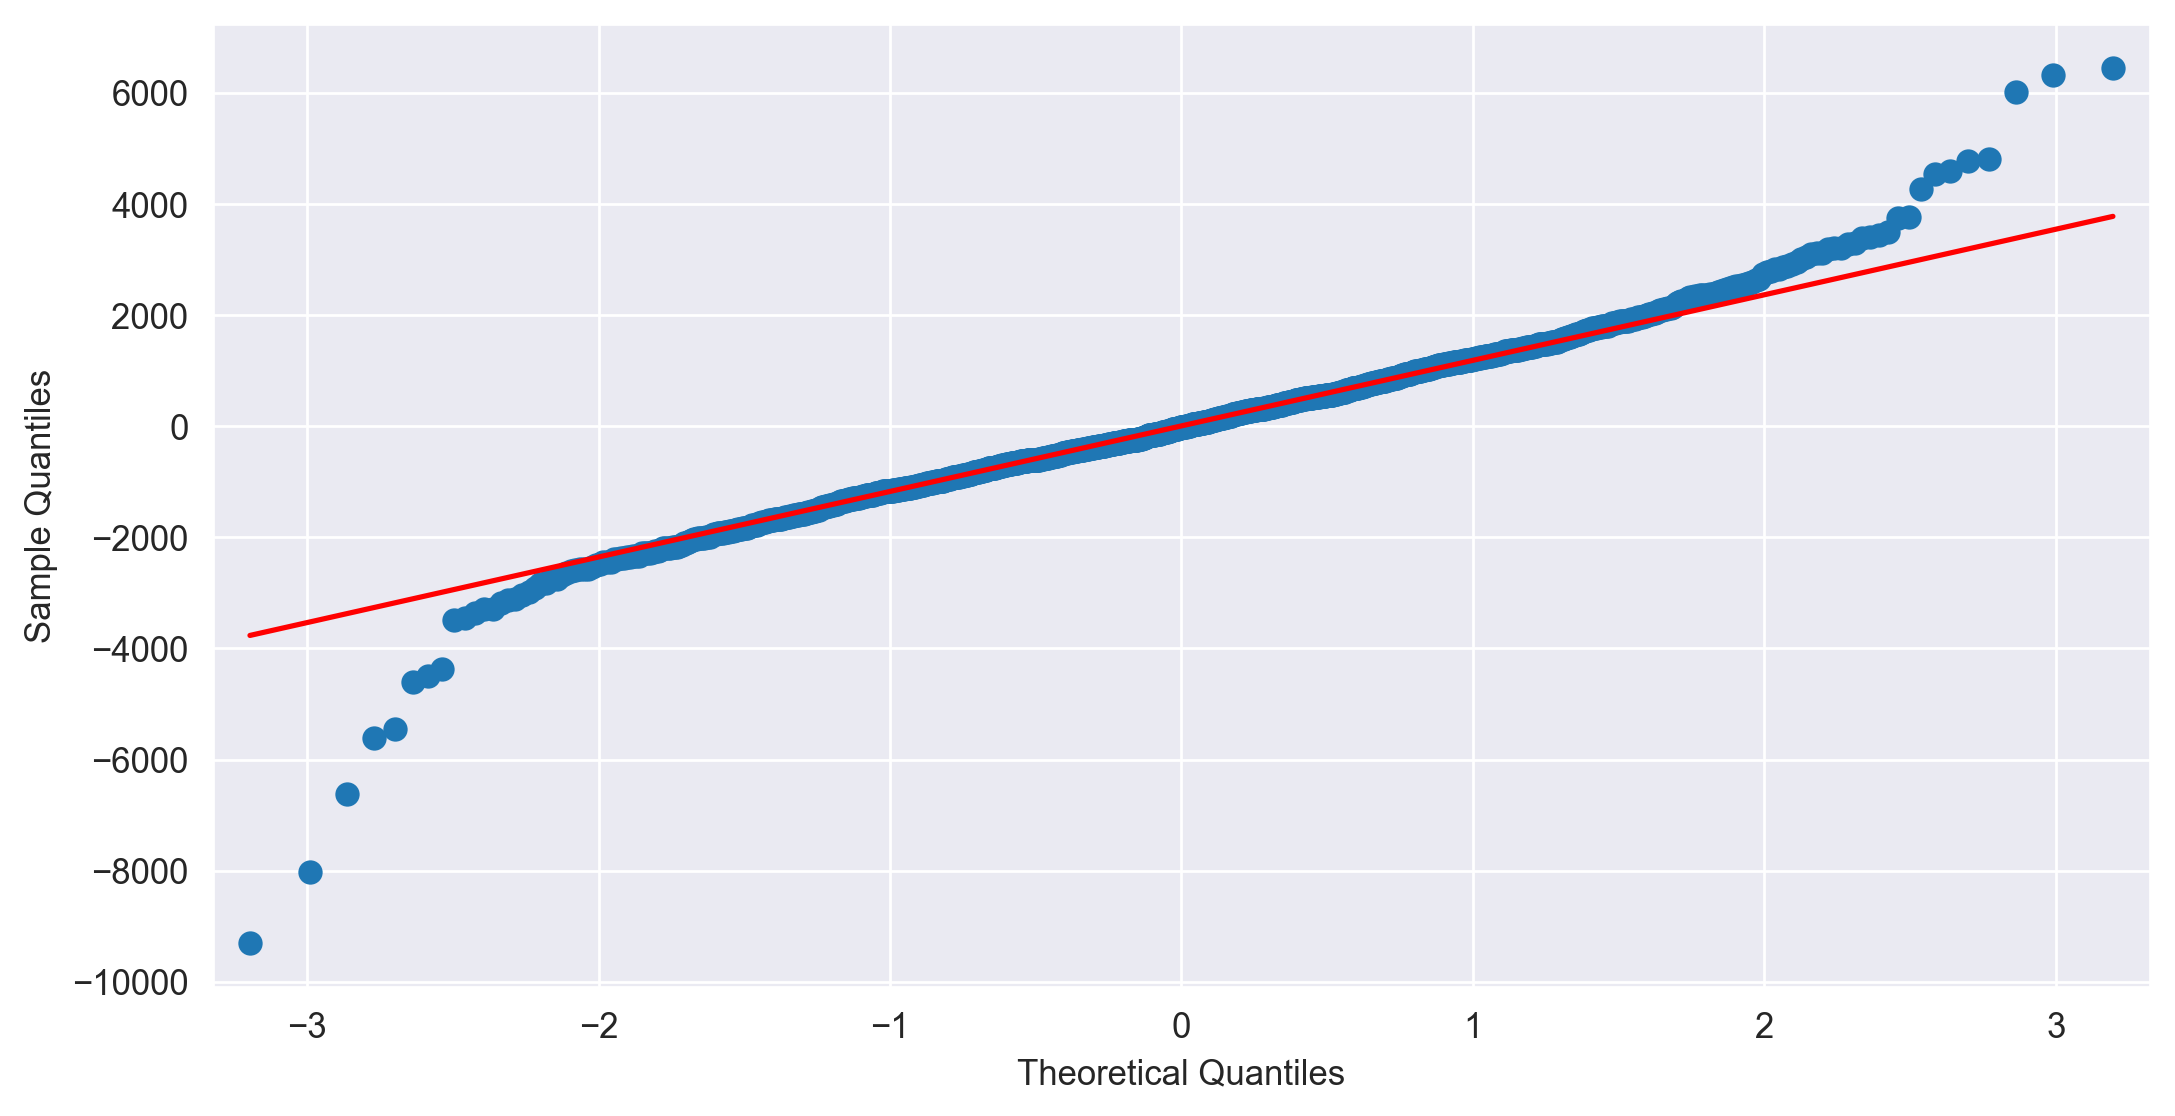

In [41]:
#Q-Q Plot
sm.qqplot(model_1.resid, line='q');

In [42]:
# Get index for residuals higher than 6000
np.where(model_1.resid > 6000)

(array([109, 146, 522], dtype=int64),)

In [43]:
# Get index for residuals lower than -6000
np.where(model_1.resid < -6000)

(array([220, 600, 959], dtype=int64),)

> * #### As we see in Q-Q Plot Residuals not follow Normal Distribution as some points are away from line they are influencial data points.

<br>

##### 2. <u> Residual plot of Homoscedasticity<u>

- Homoscedasticity can be checked by plotting a scatter plot between fitted values(ŷ) and residuals(e).

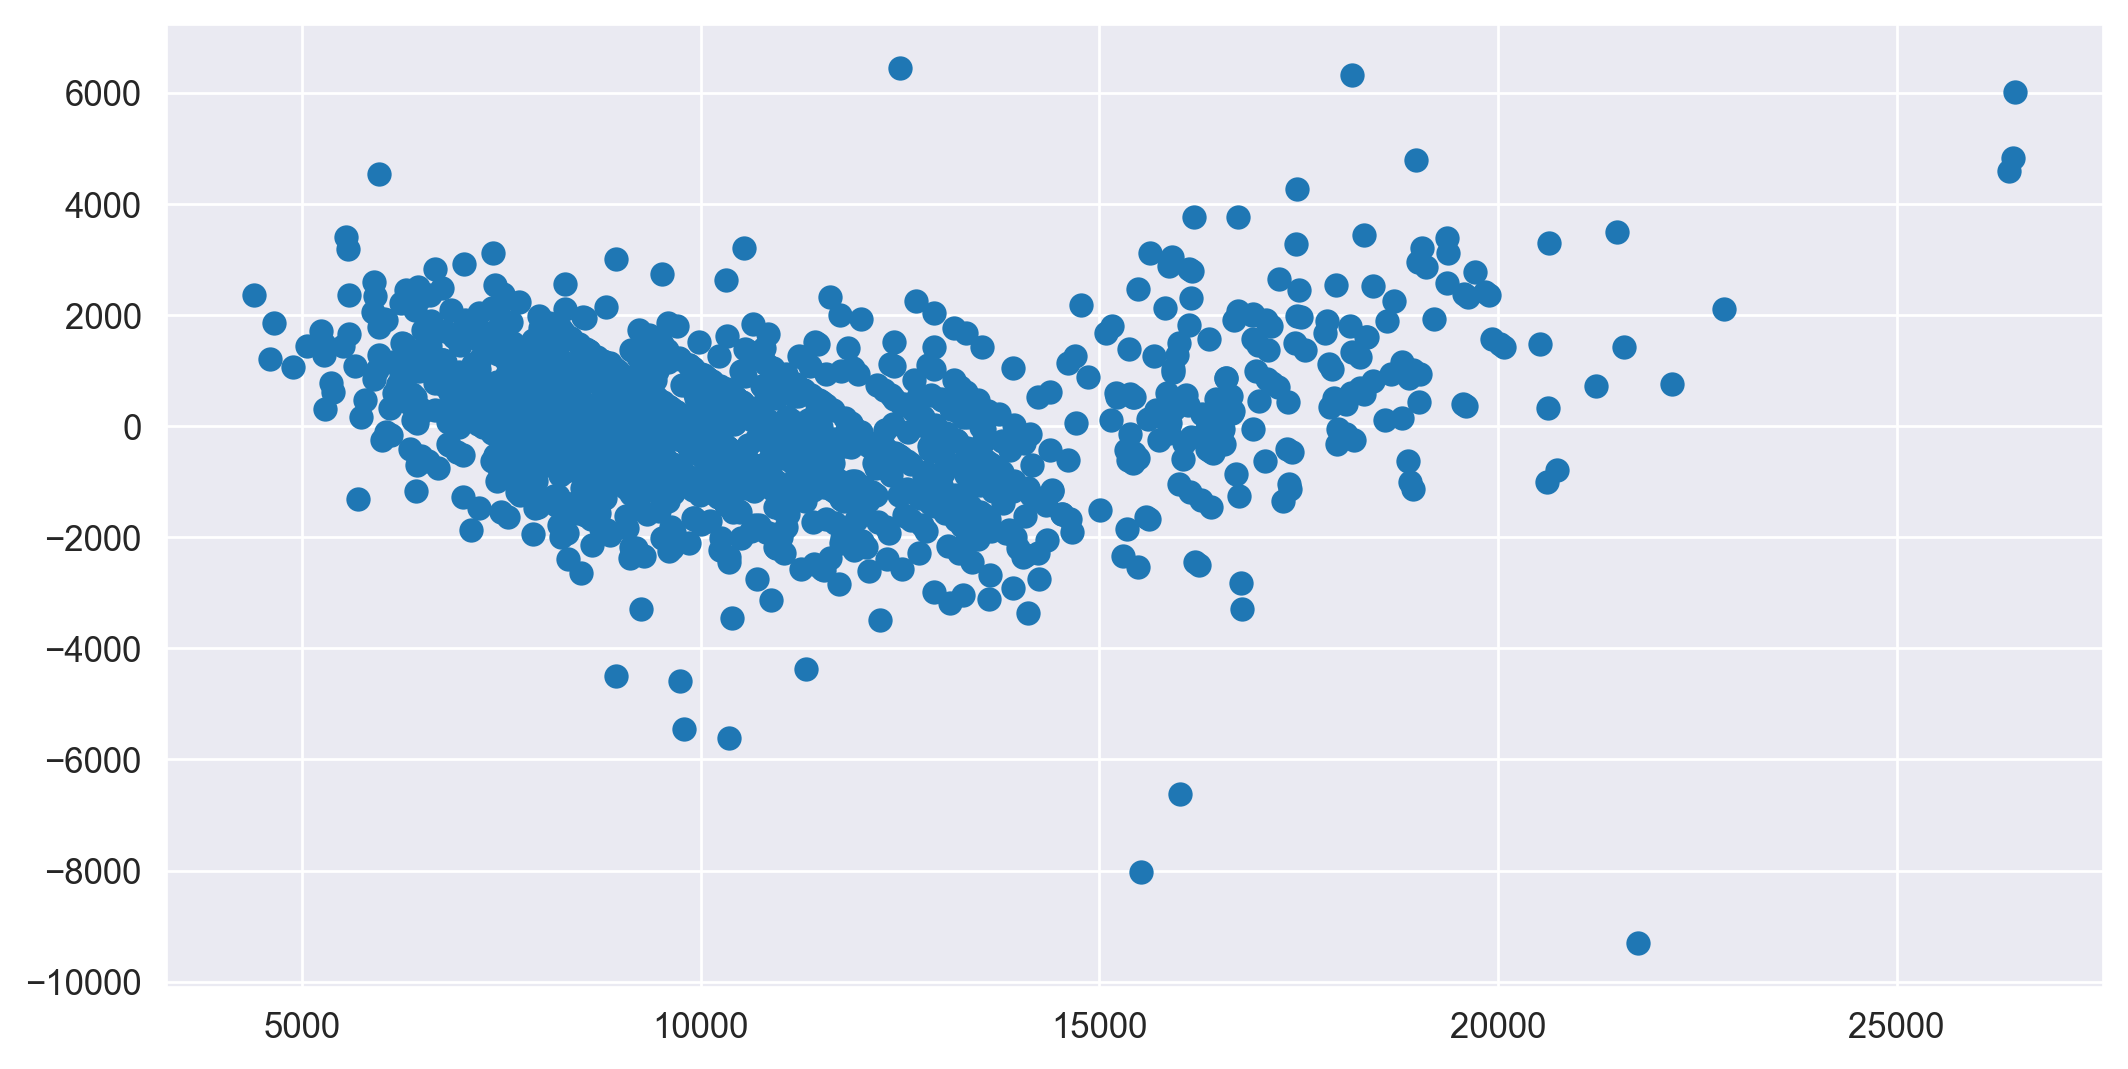

In [44]:
plt.scatter(model_1.fittedvalues, model_1.resid)

> * ####  In above scatter plot we see crescent shaped pattern means model is not performing well due to presence of influence data points. (Ecpected No Pattern i.e. constant variance)

##### 3. <u> Residual Vs Regressor Plot <u>

- Mean of errors should be zero i.e. slope = 0

eval_env: 1


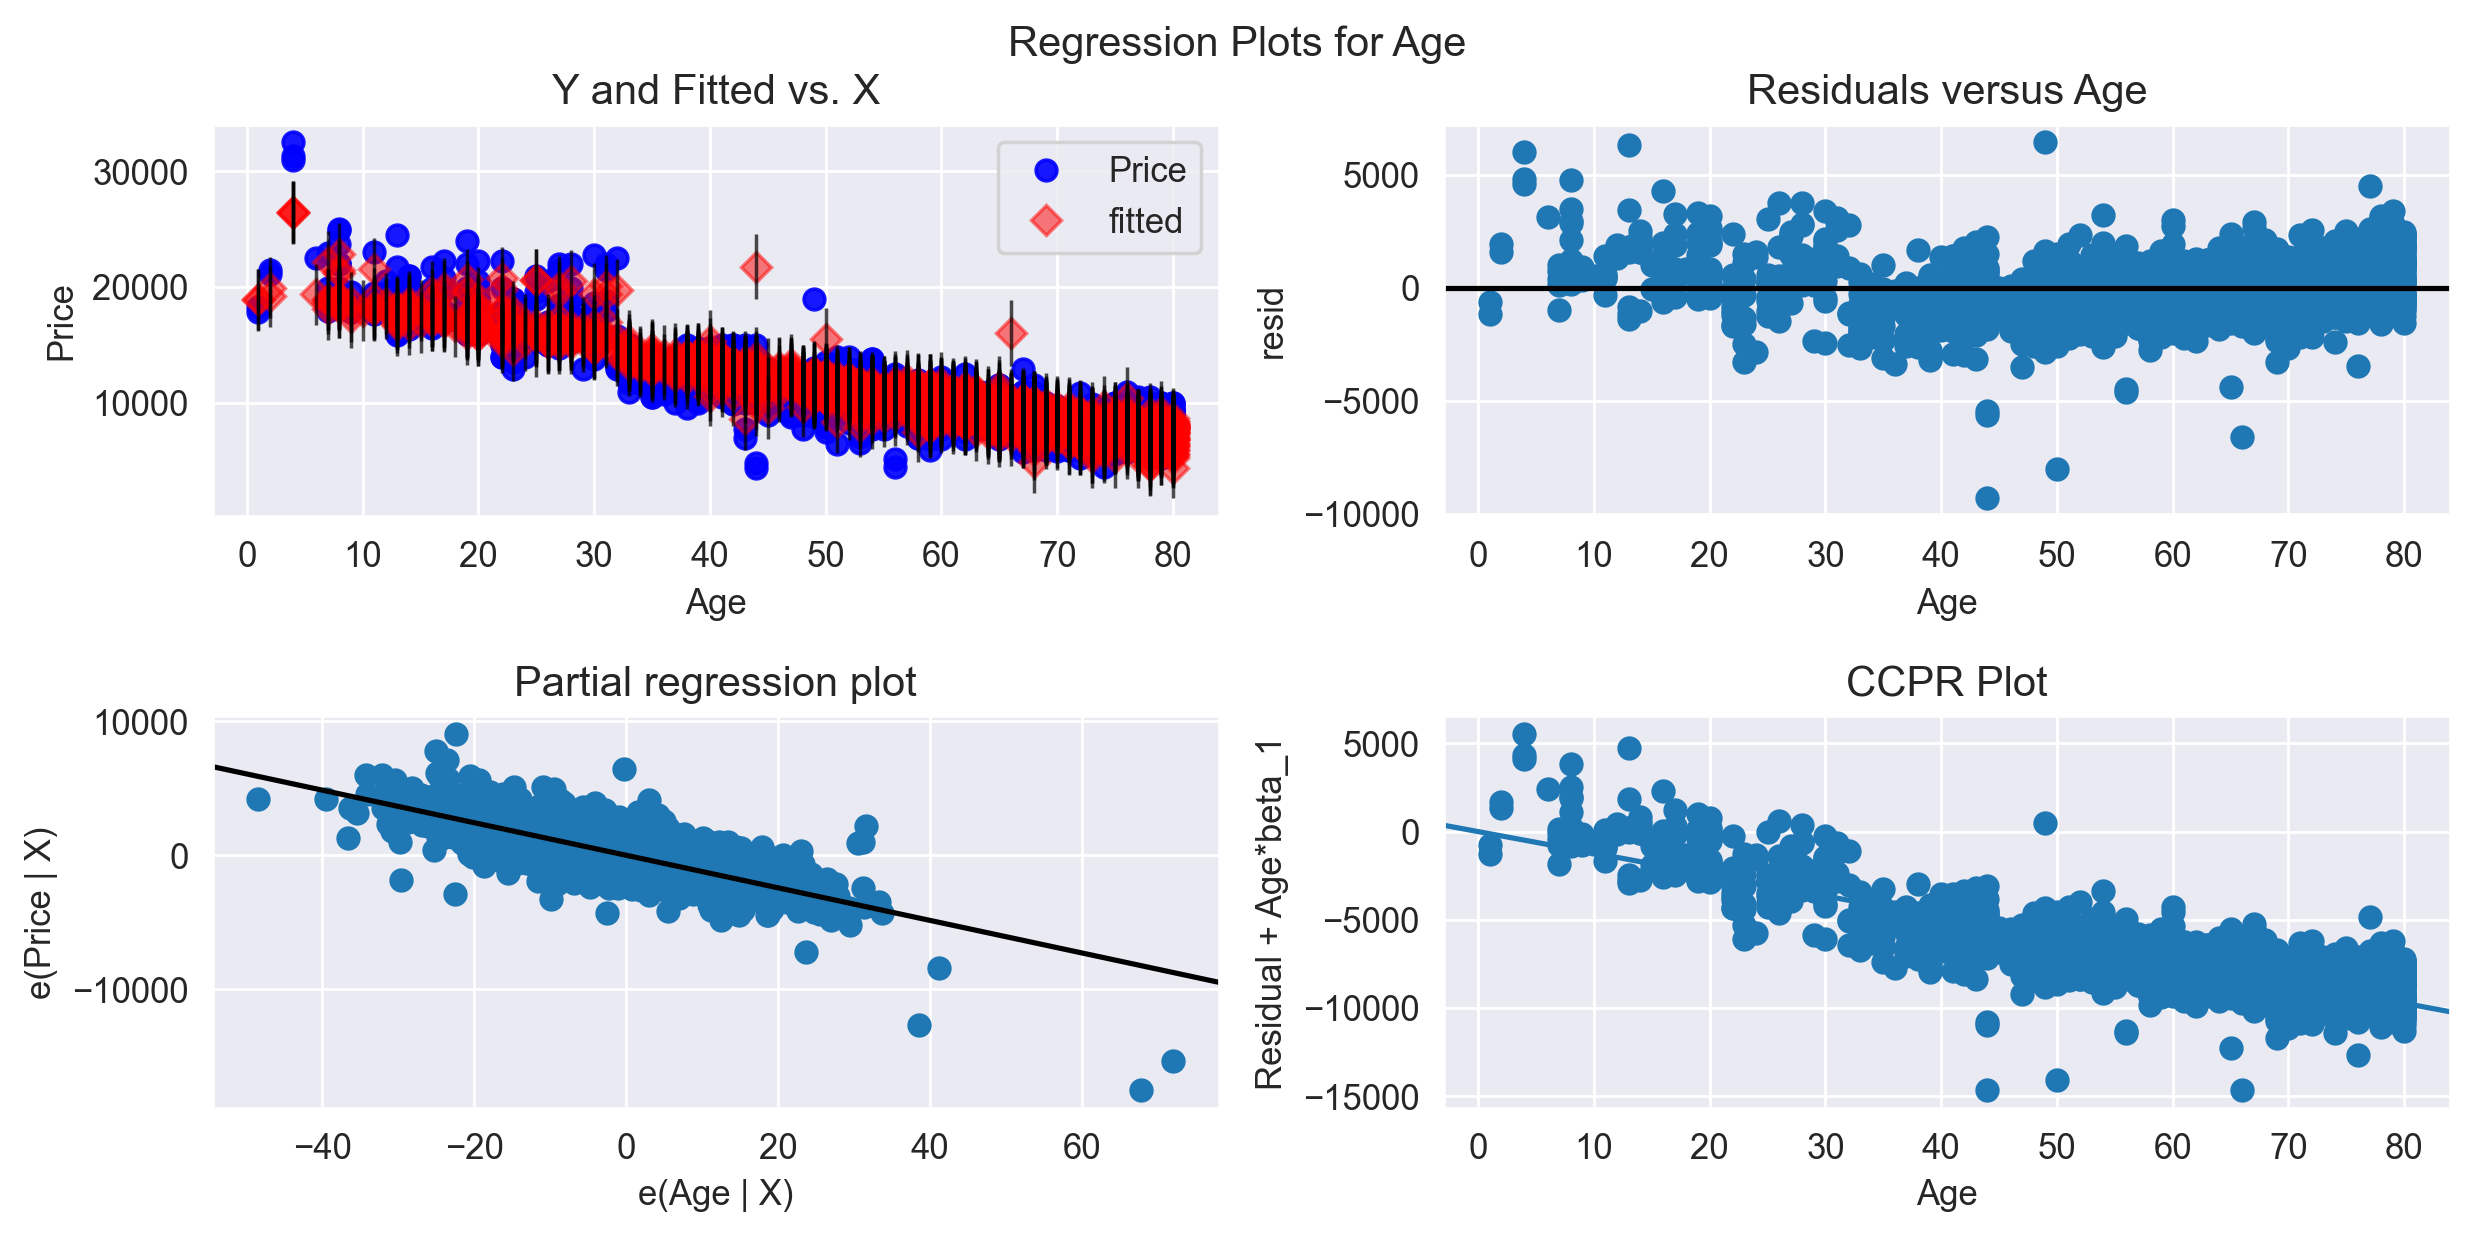

In [45]:
# Age
sm.graphics.plot_regress_exog(model_1,'Age');

eval_env: 1


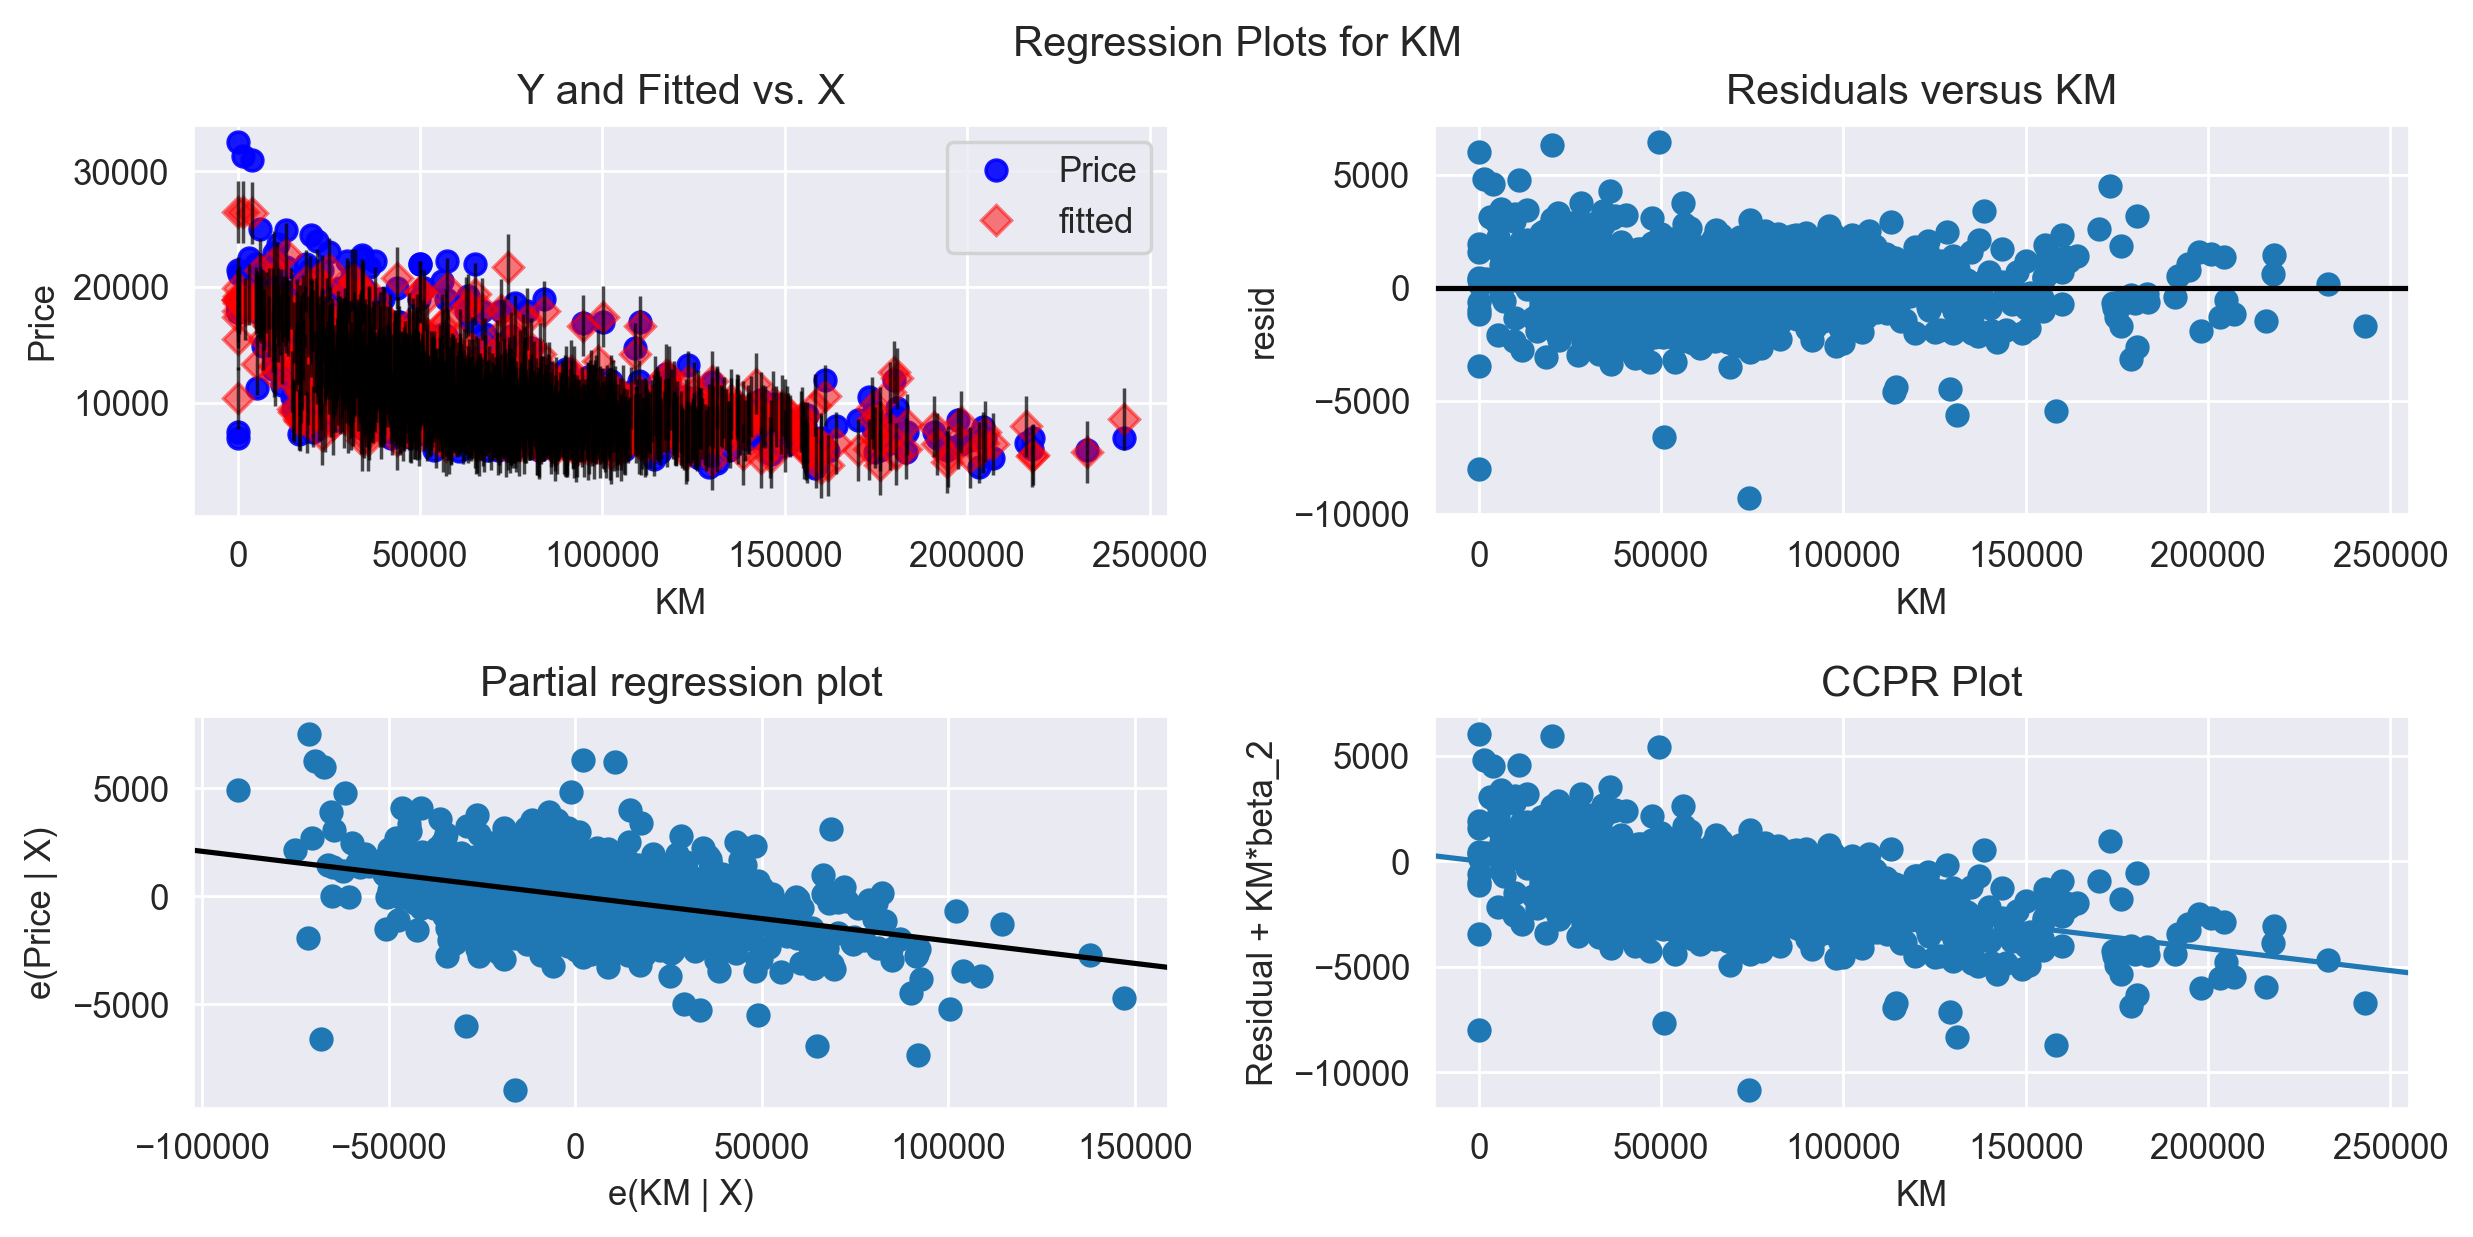

In [46]:
# KM
sm.graphics.plot_regress_exog(model_1,'KM');

eval_env: 1


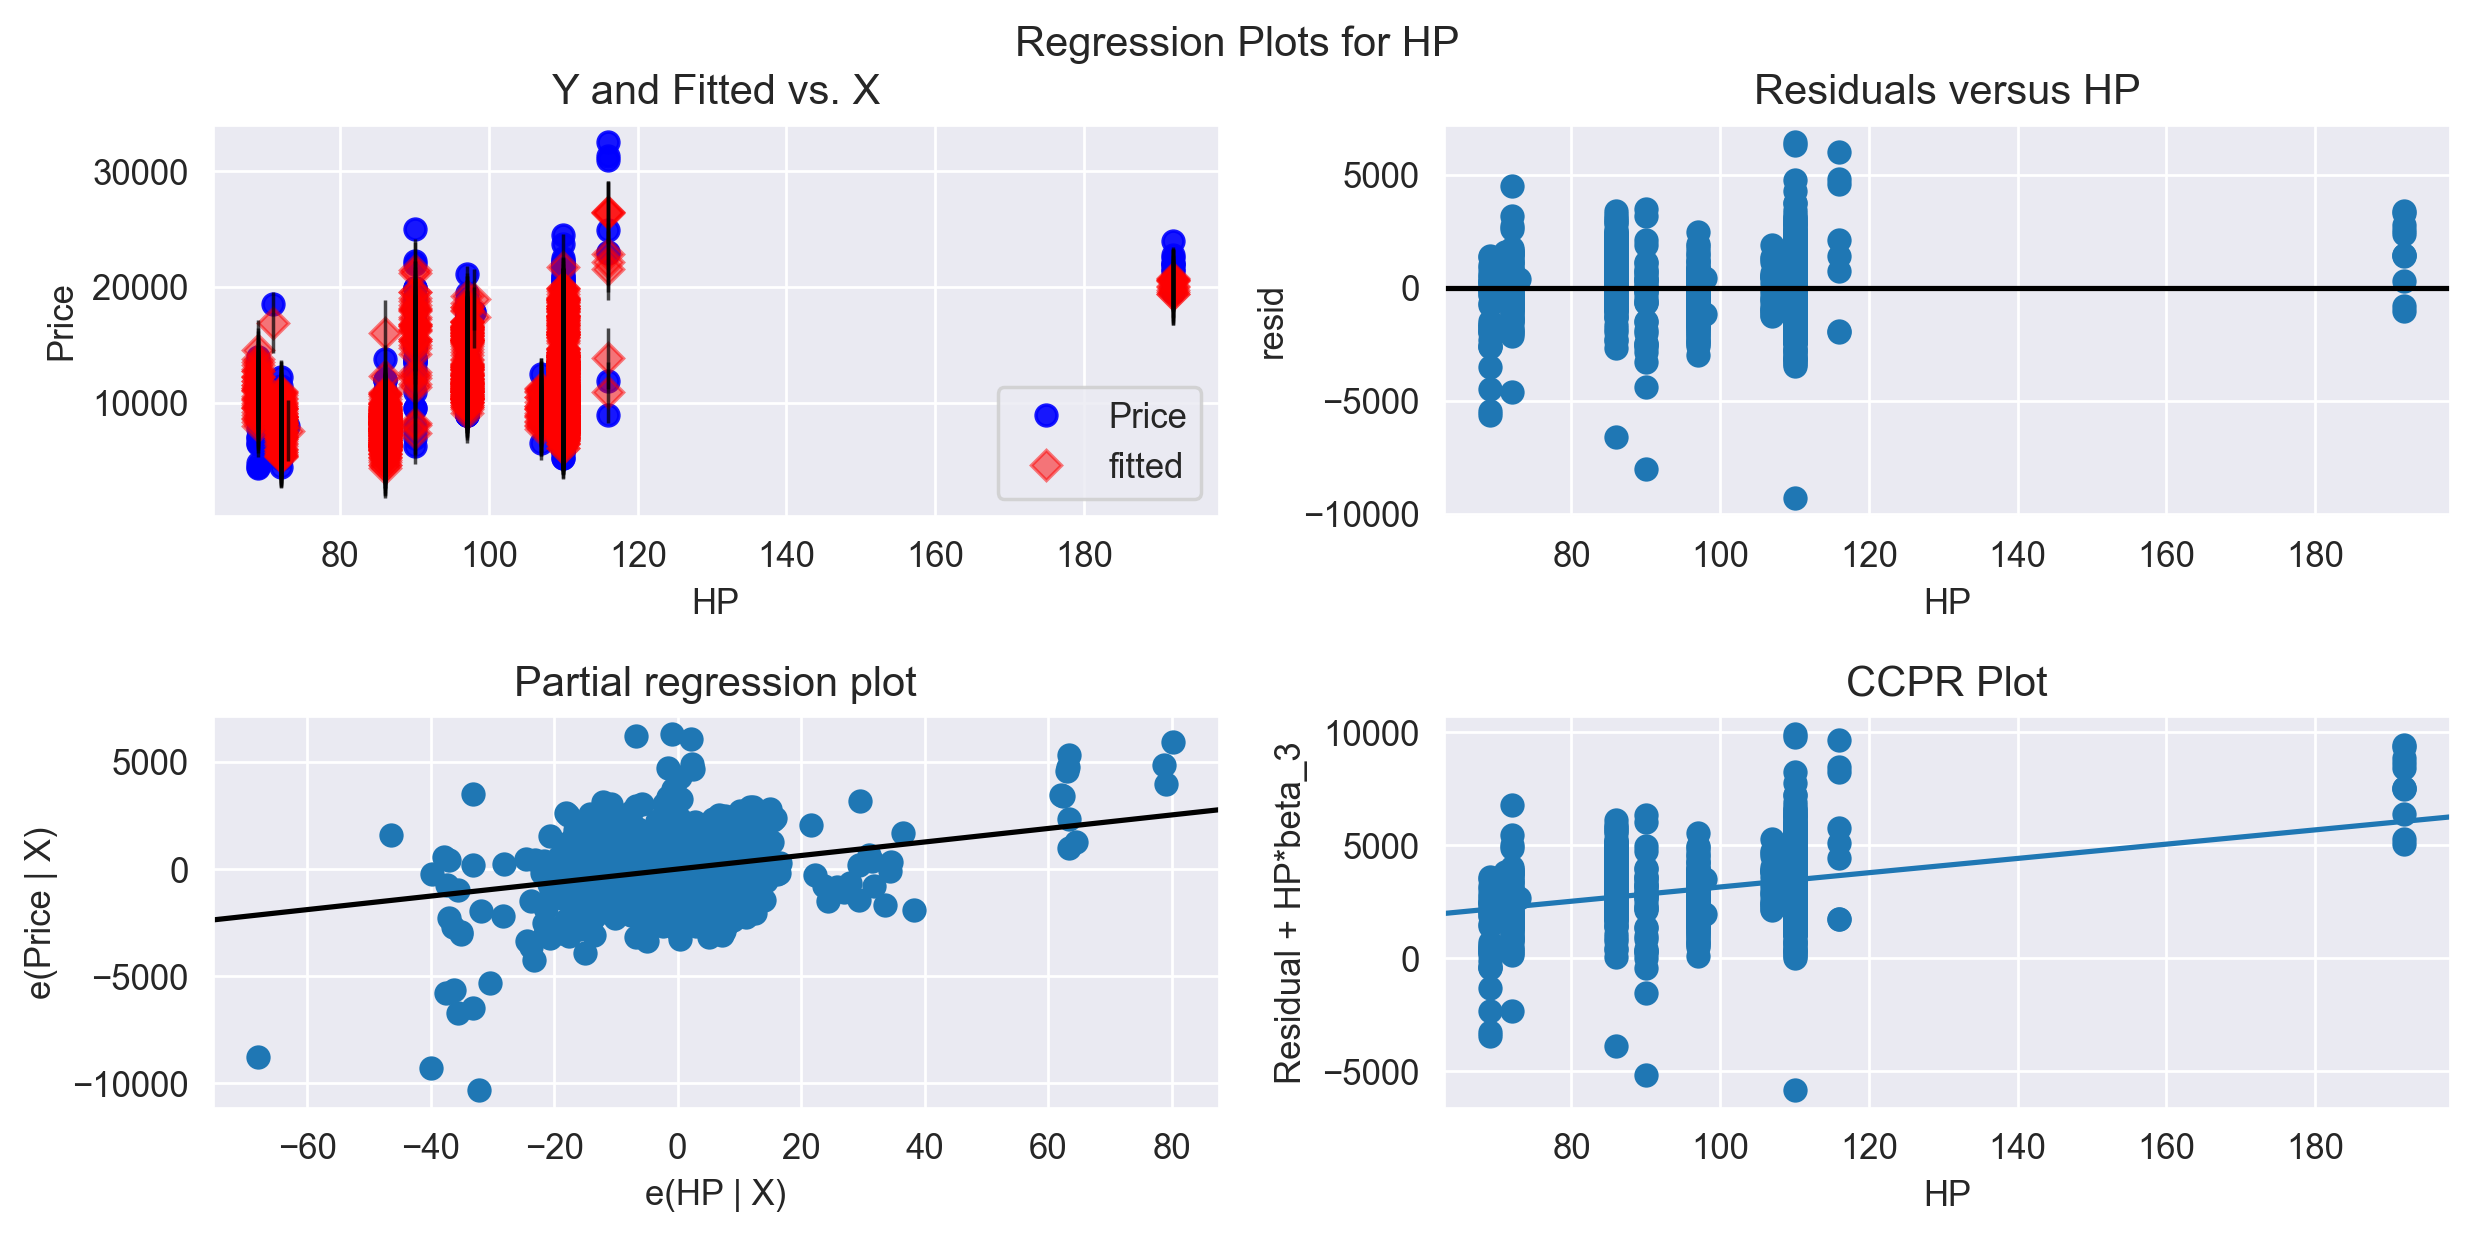

In [47]:
# HP
sm.graphics.plot_regress_exog(model_1,'HP');

eval_env: 1


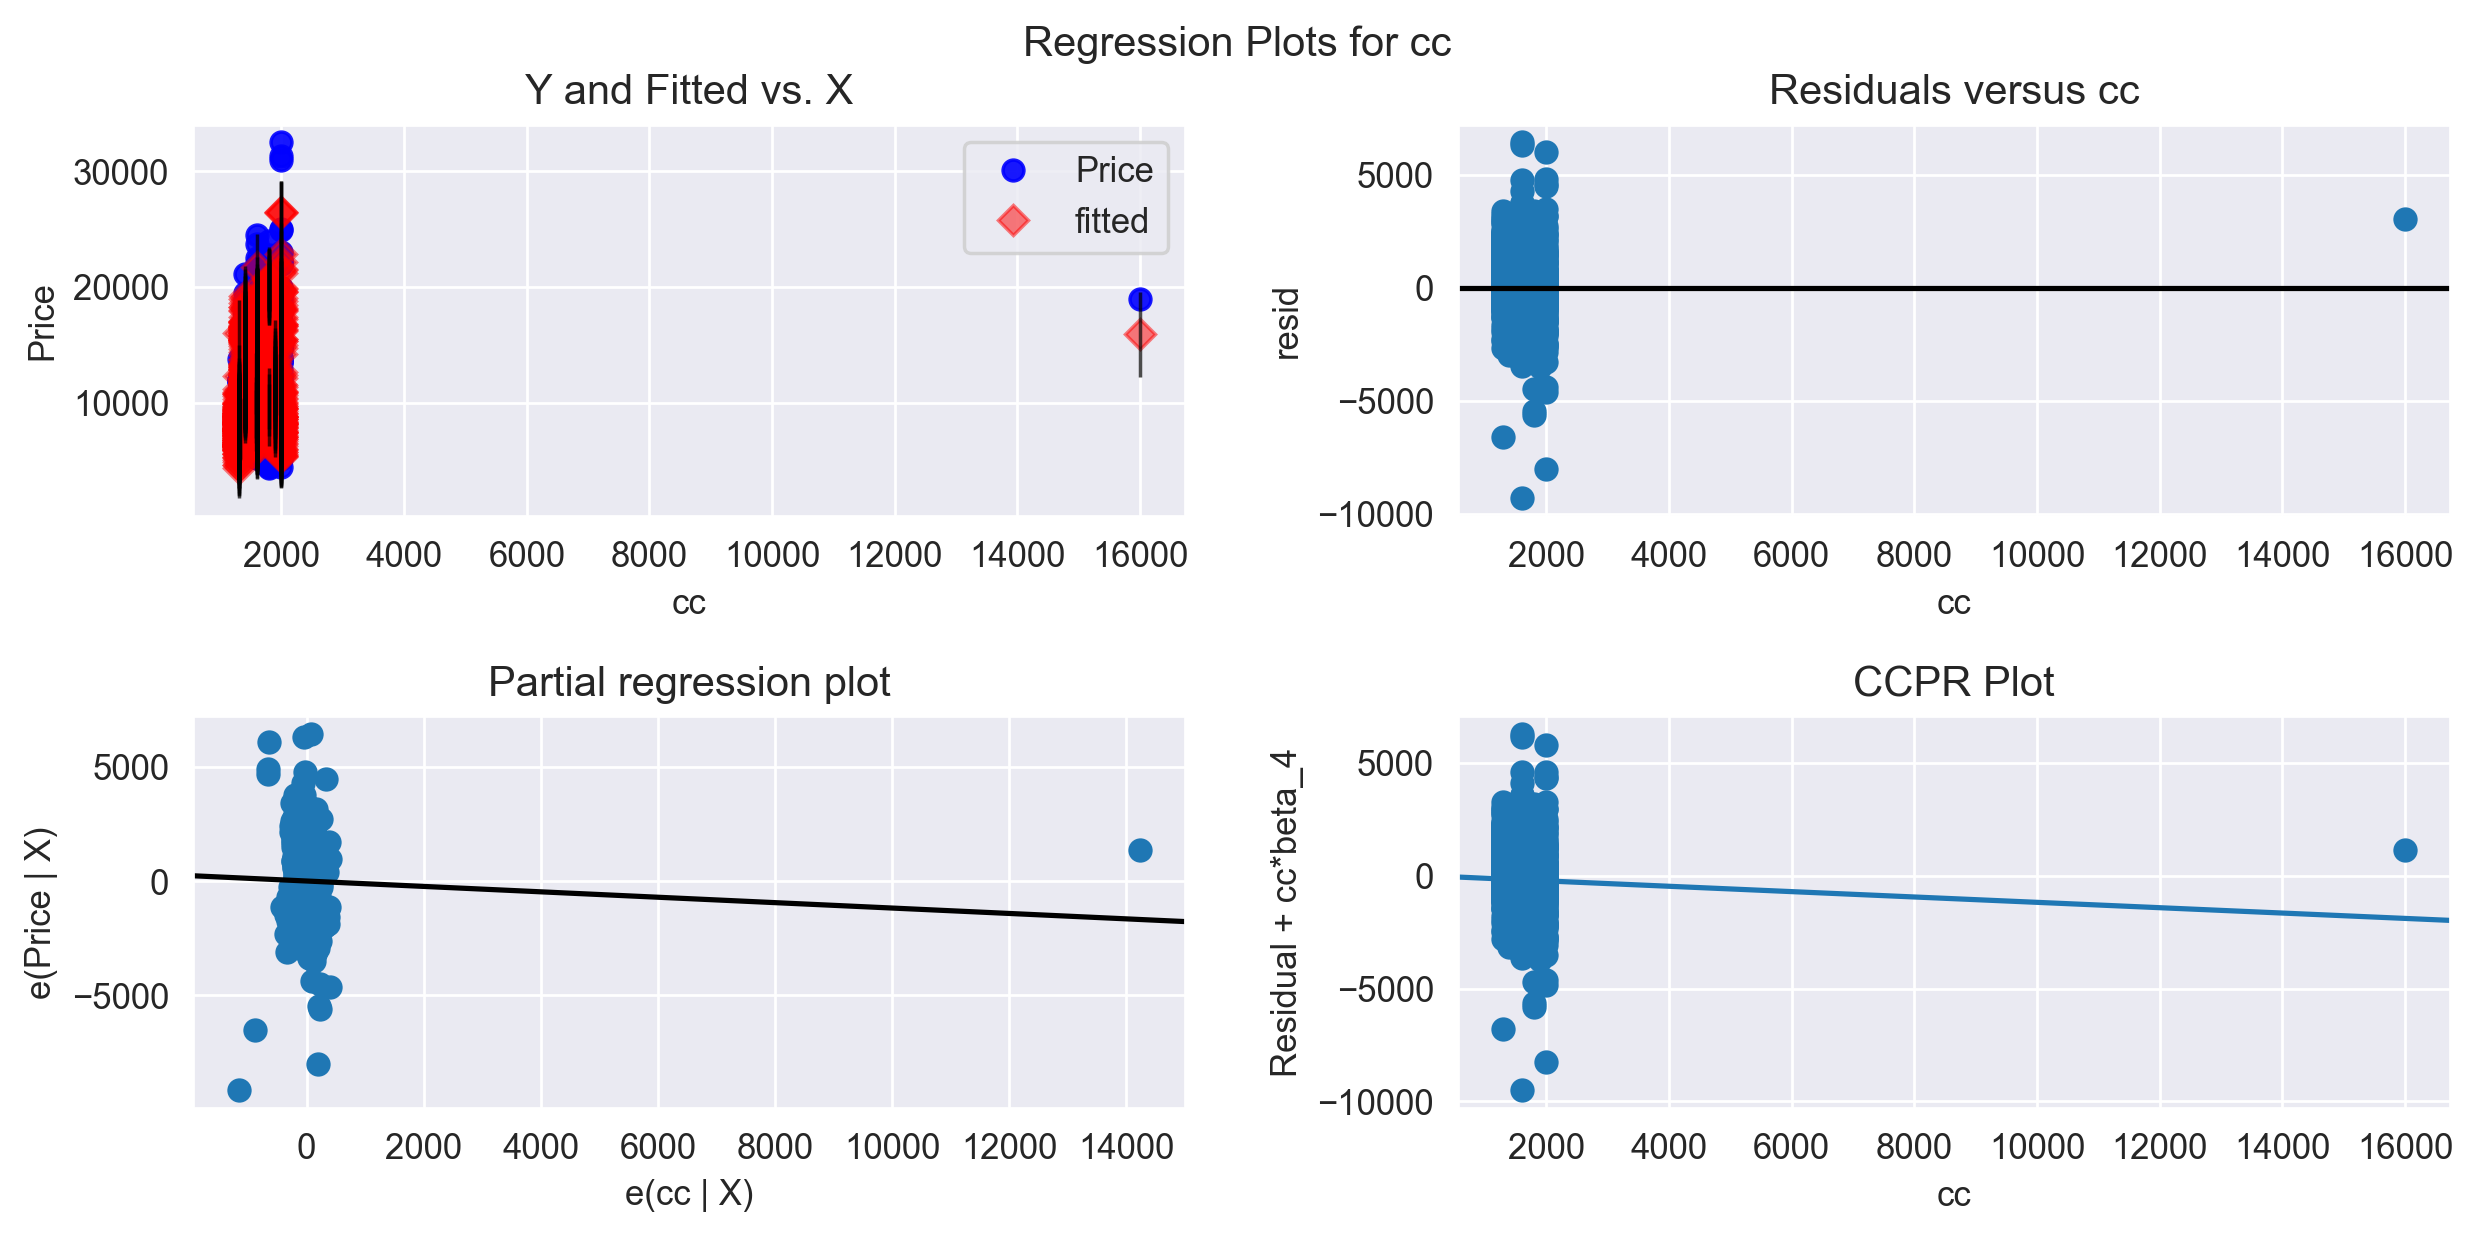

In [48]:
# cc
sm.graphics.plot_regress_exog(model_1,'cc');

eval_env: 1


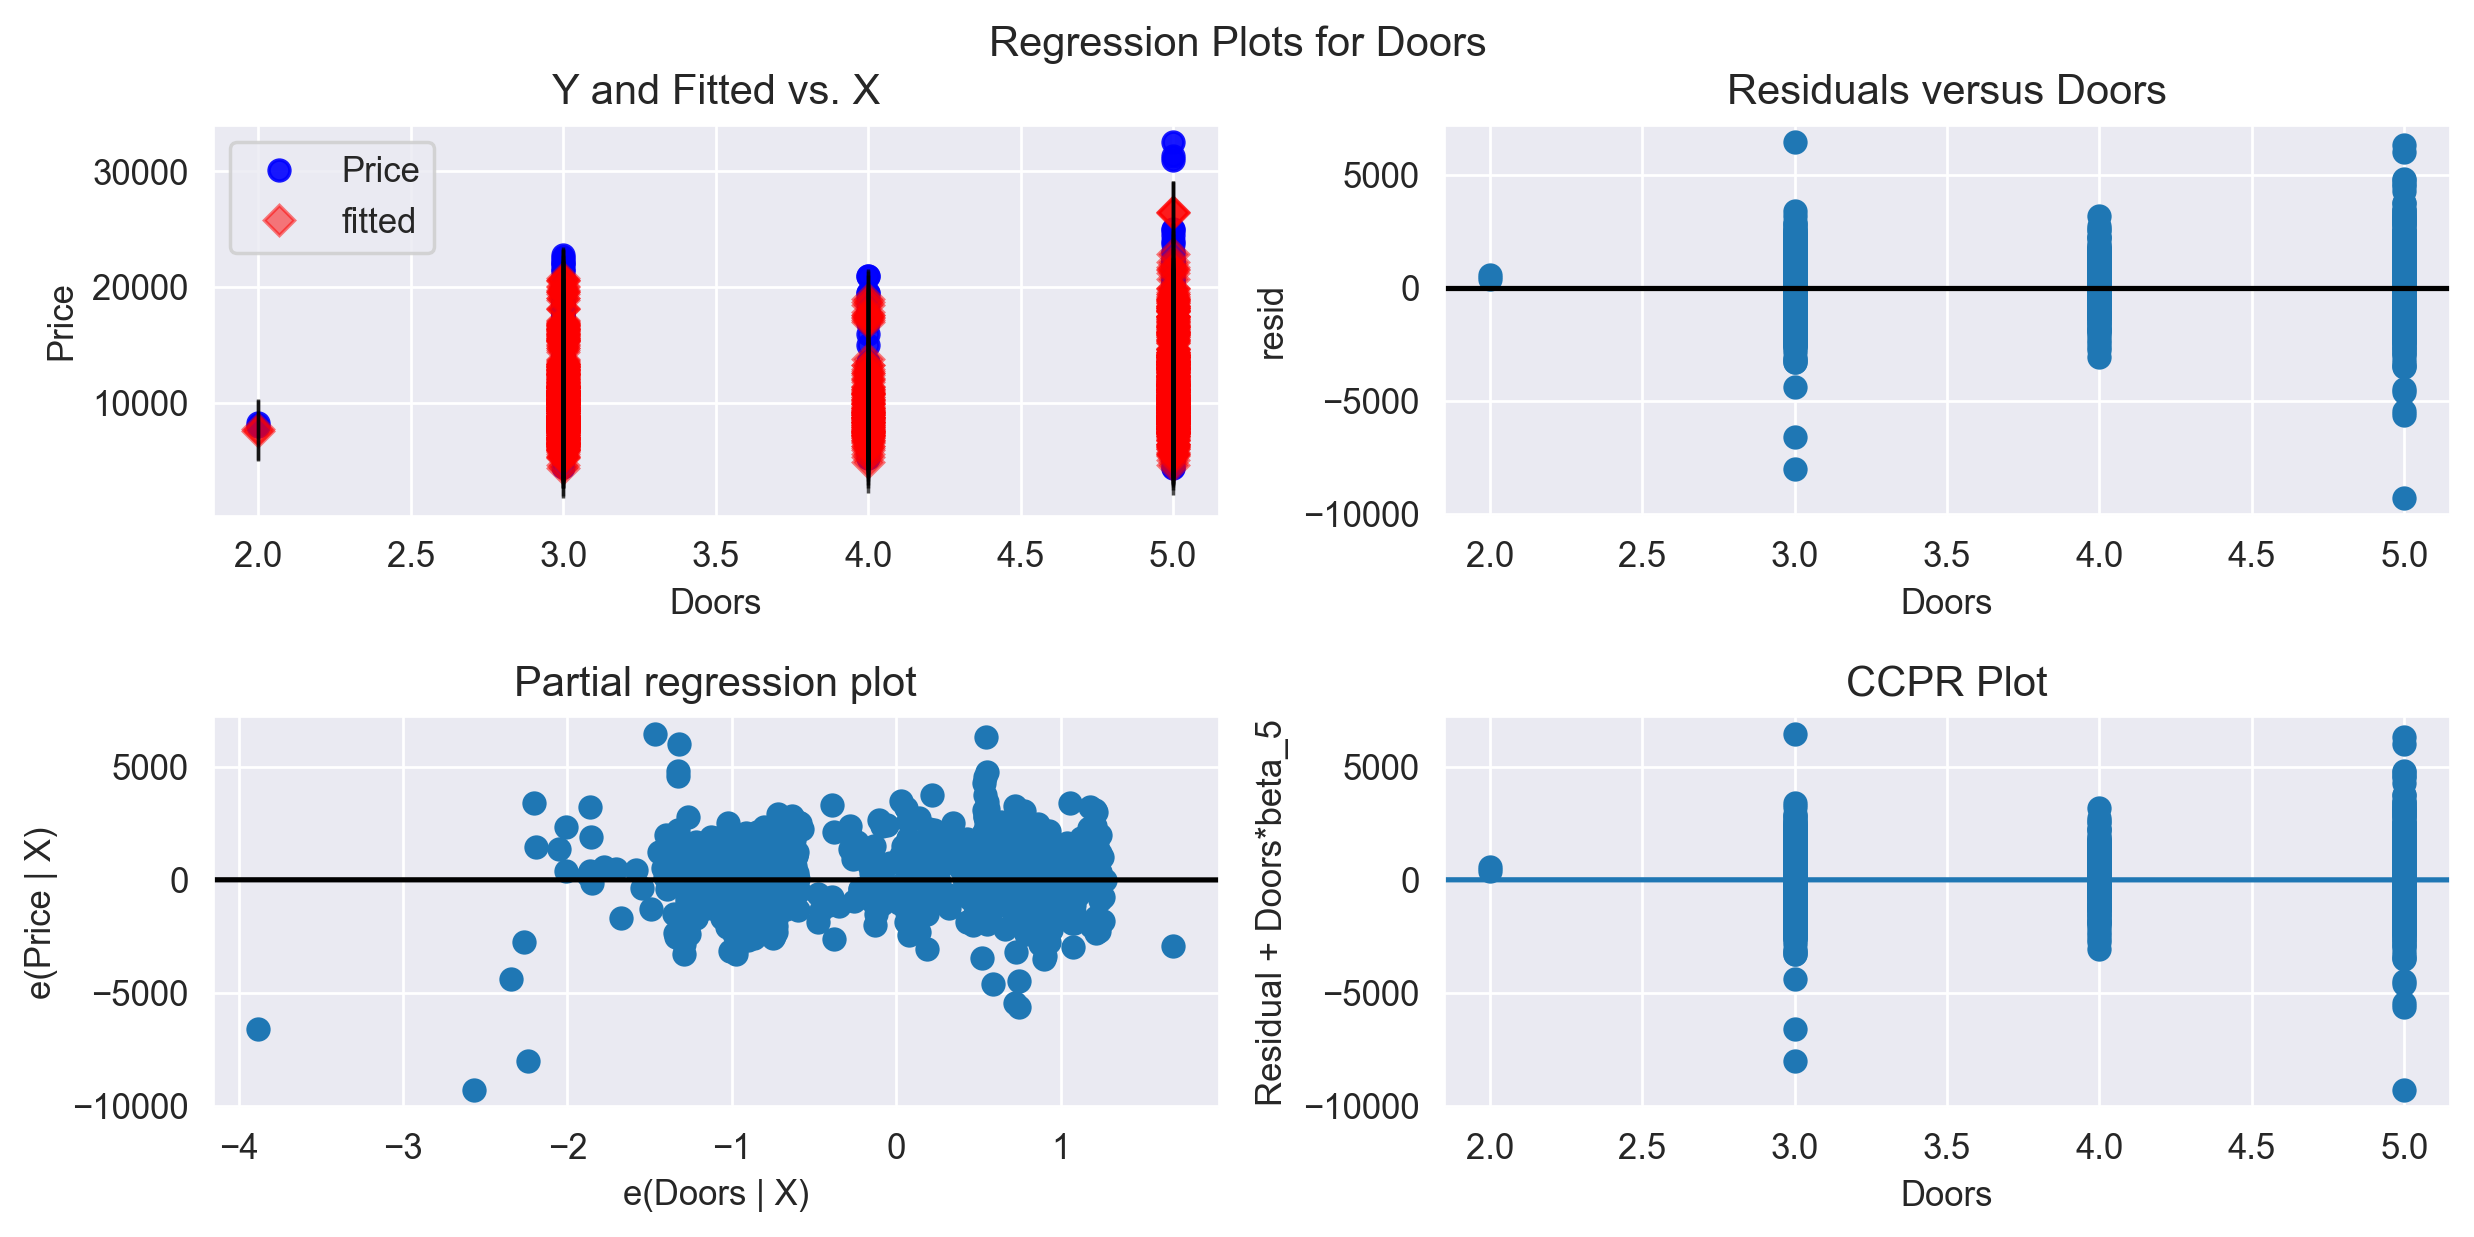

In [49]:
# Doors
sm.graphics.plot_regress_exog(model_1,'Doors');

eval_env: 1


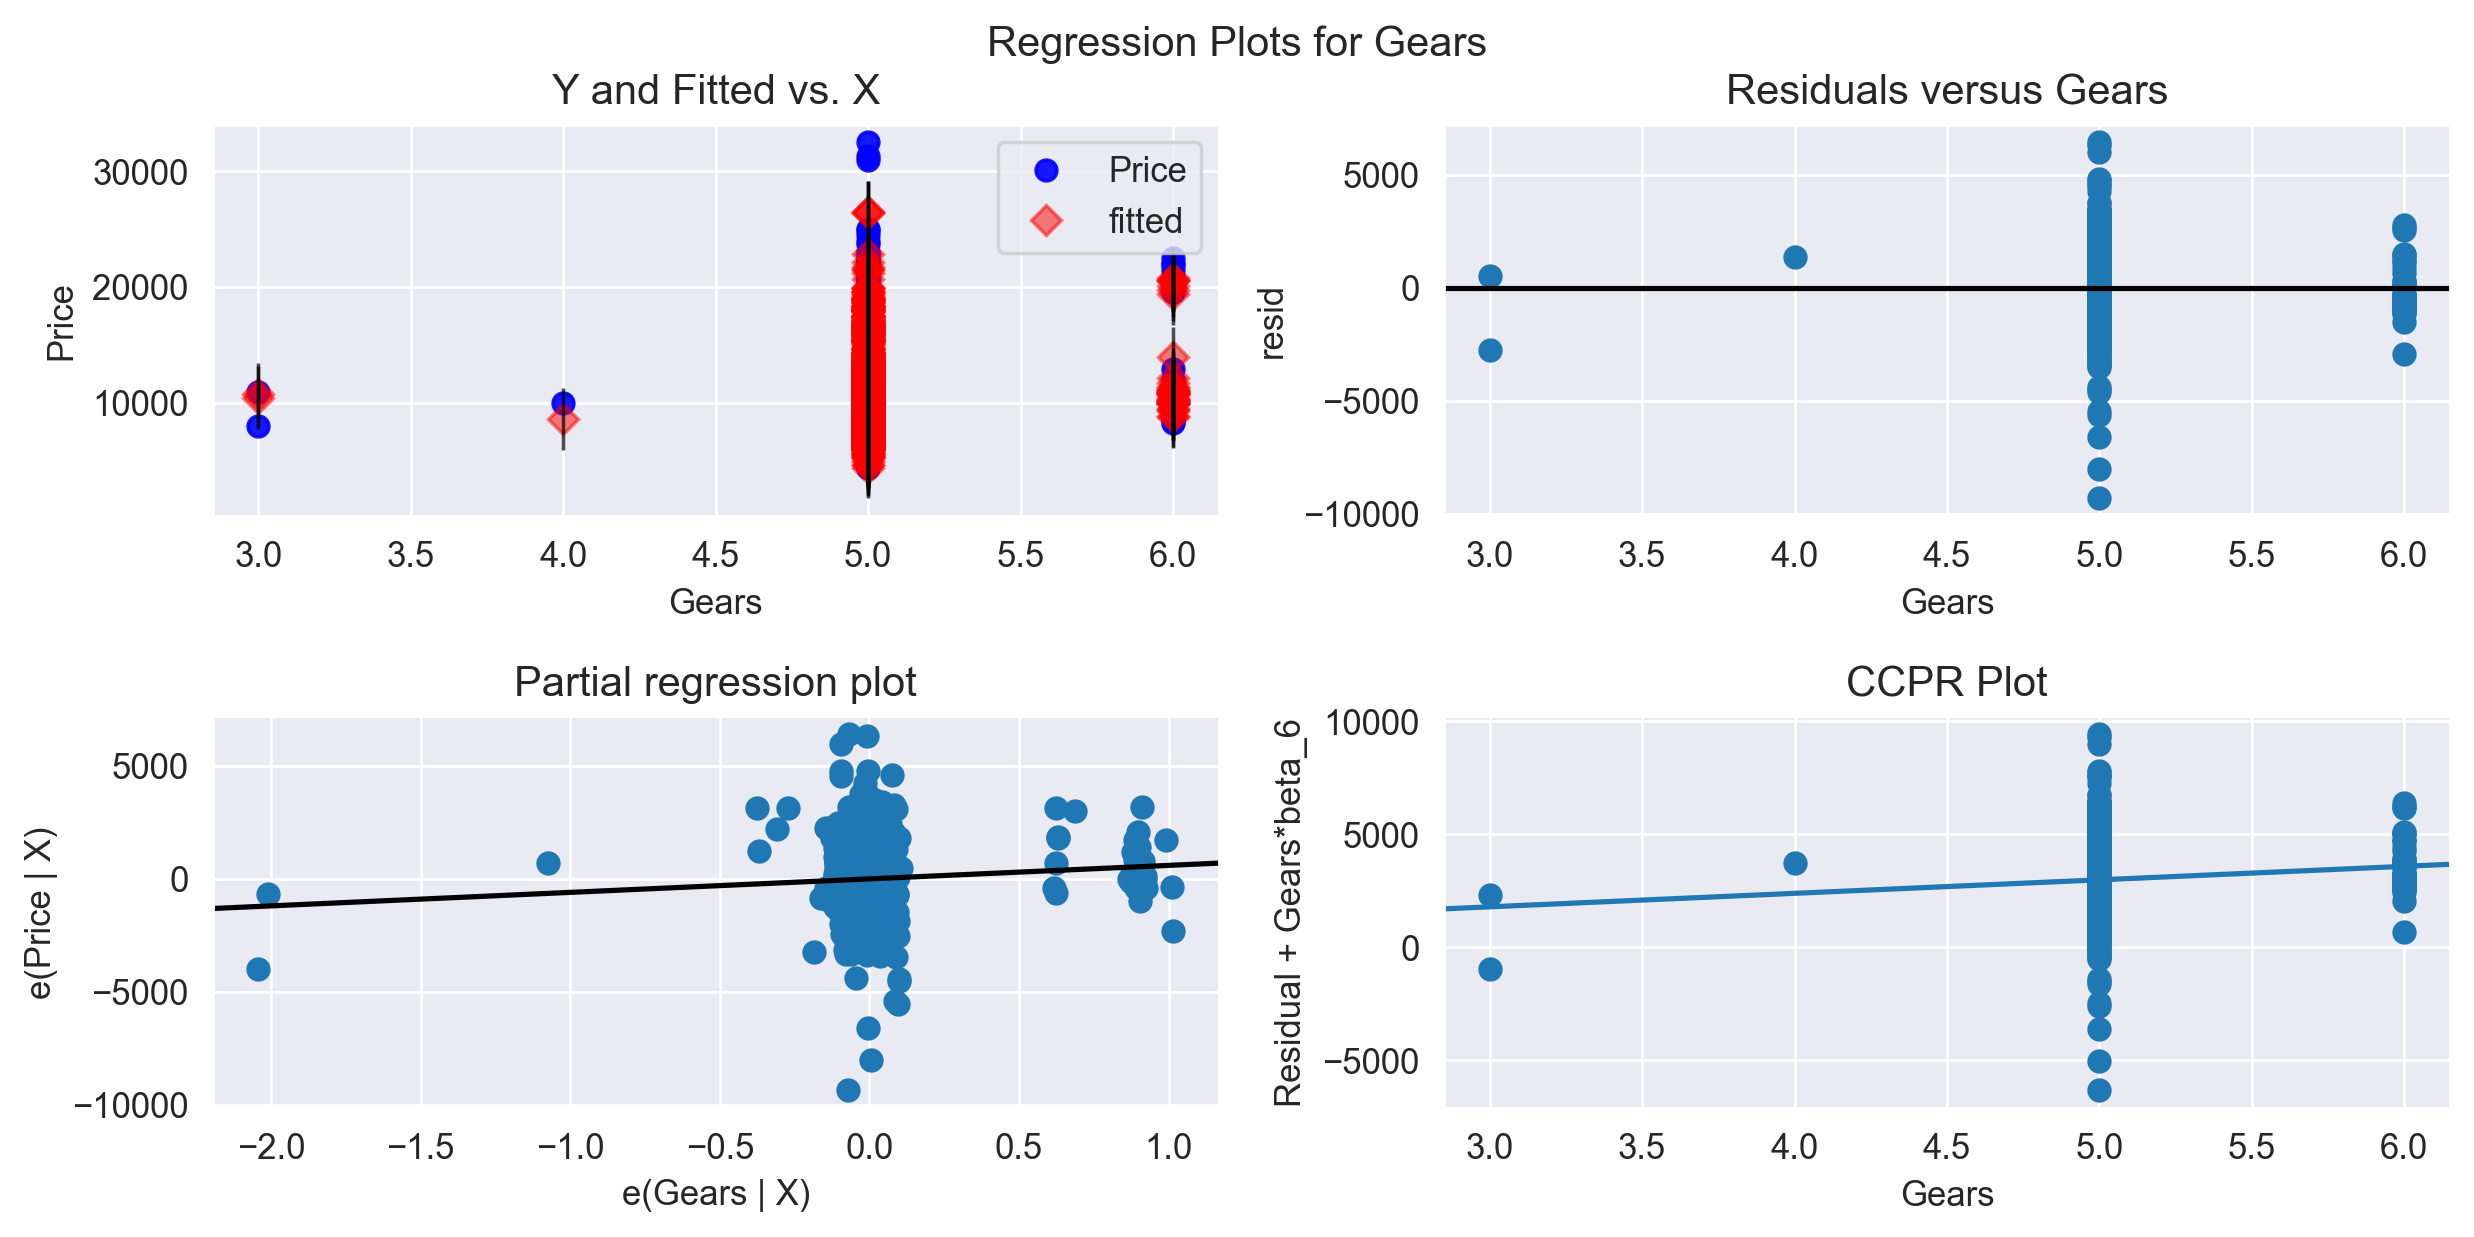

In [50]:
# Gears
sm.graphics.plot_regress_exog(model_1,'Gears');

eval_env: 1


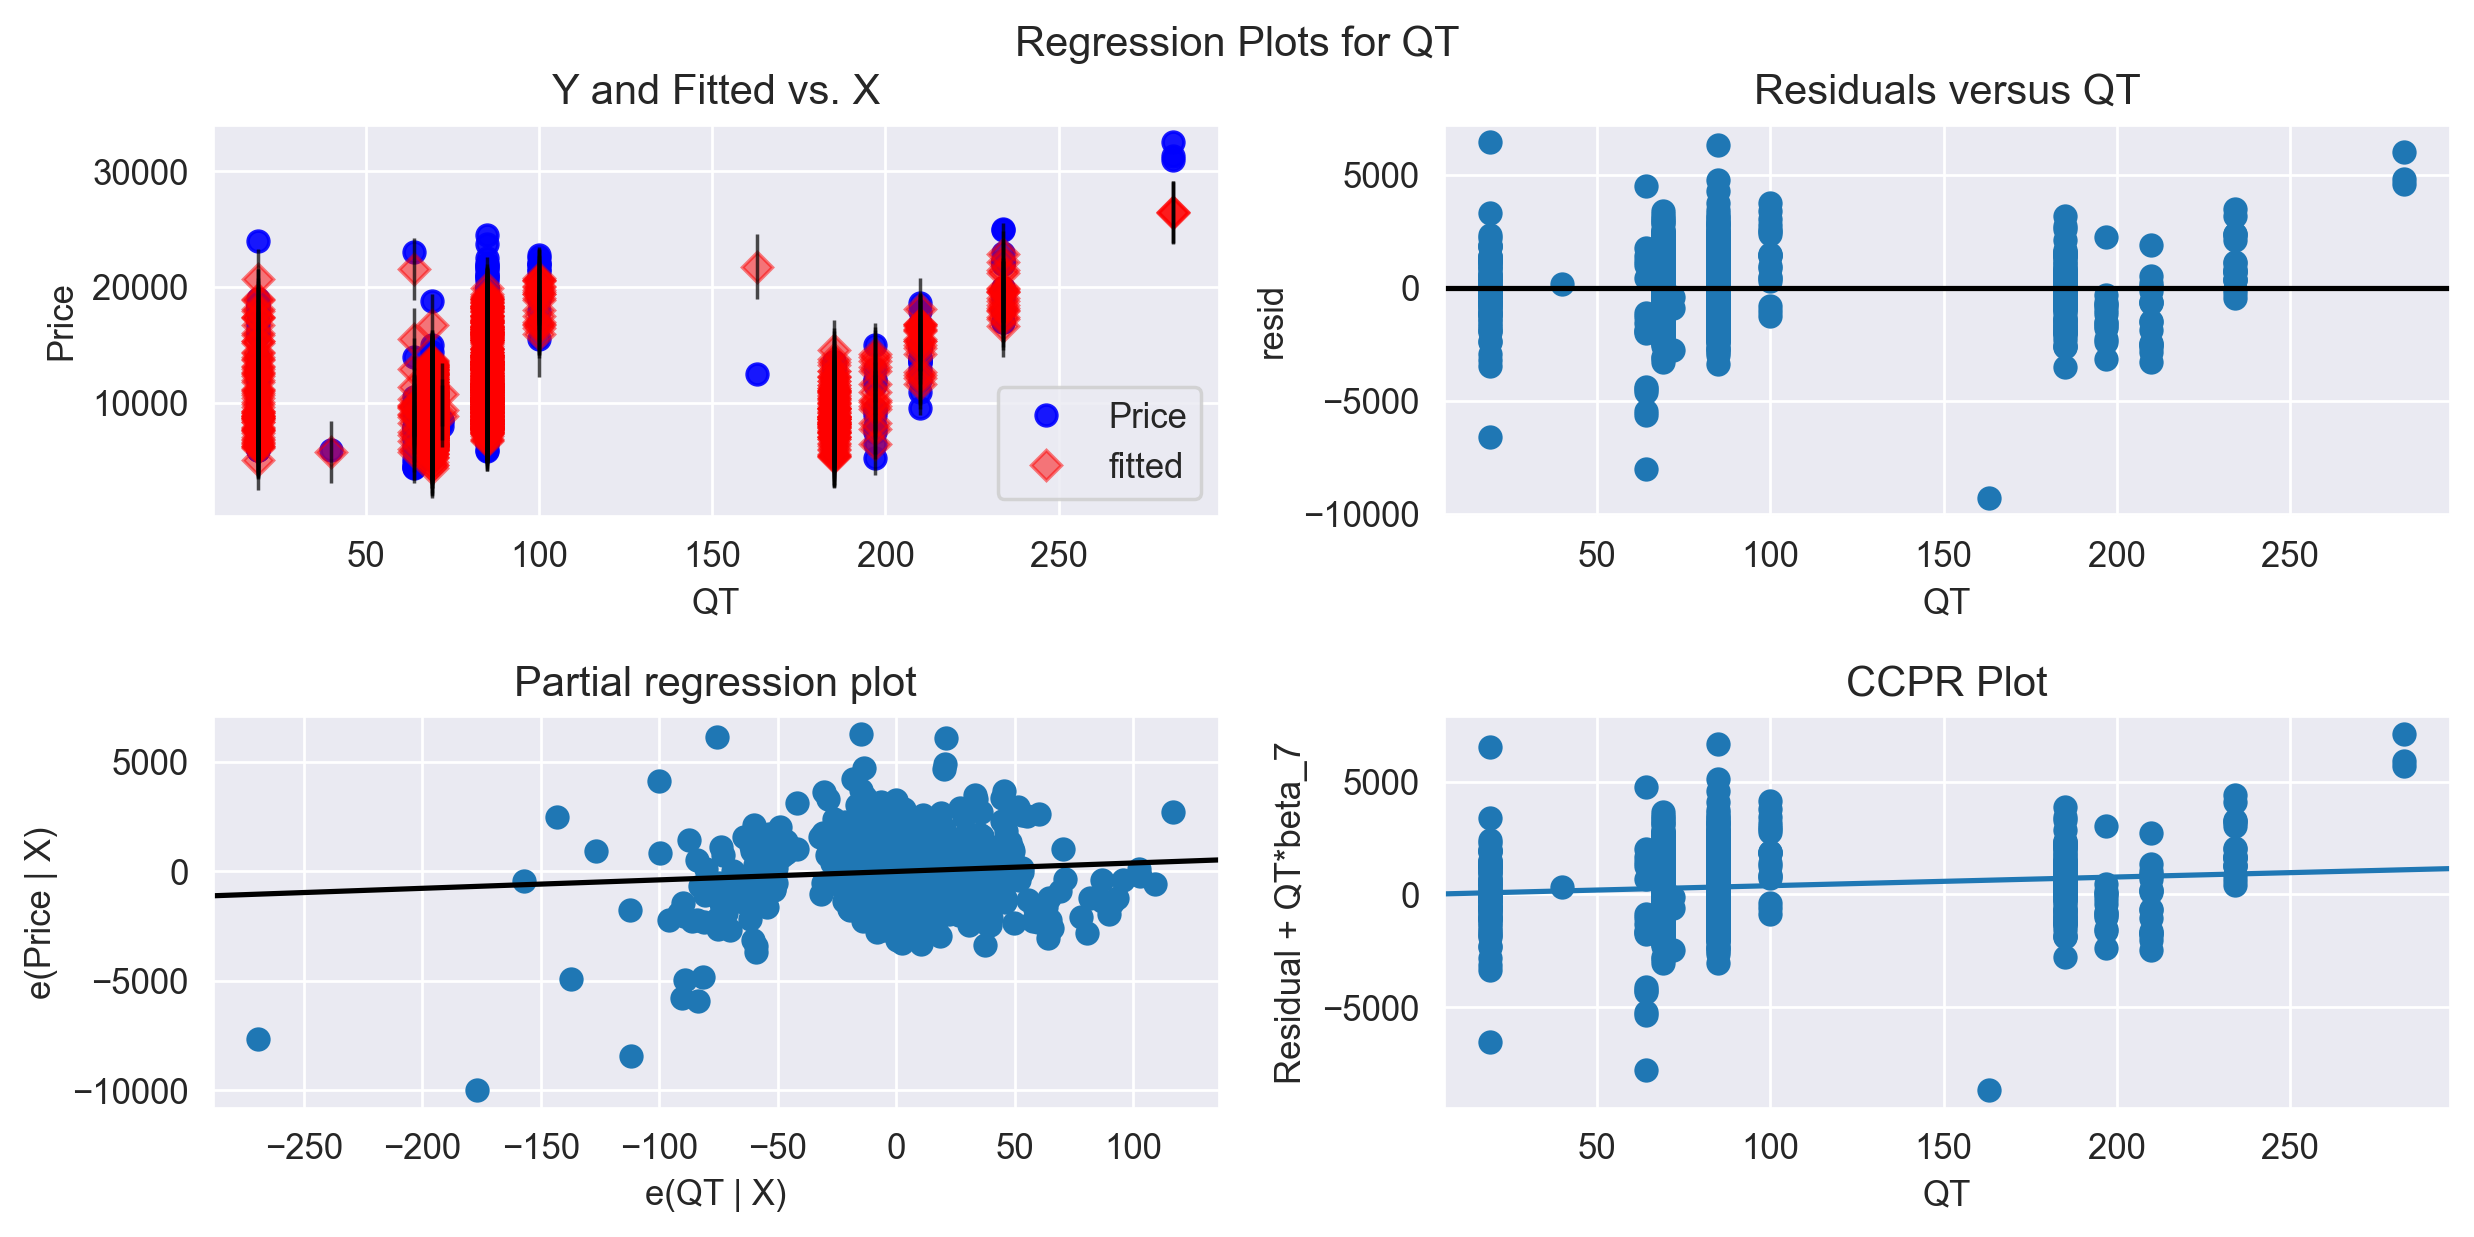

In [51]:
# QT
sm.graphics.plot_regress_exog(model_1,'QT');

eval_env: 1


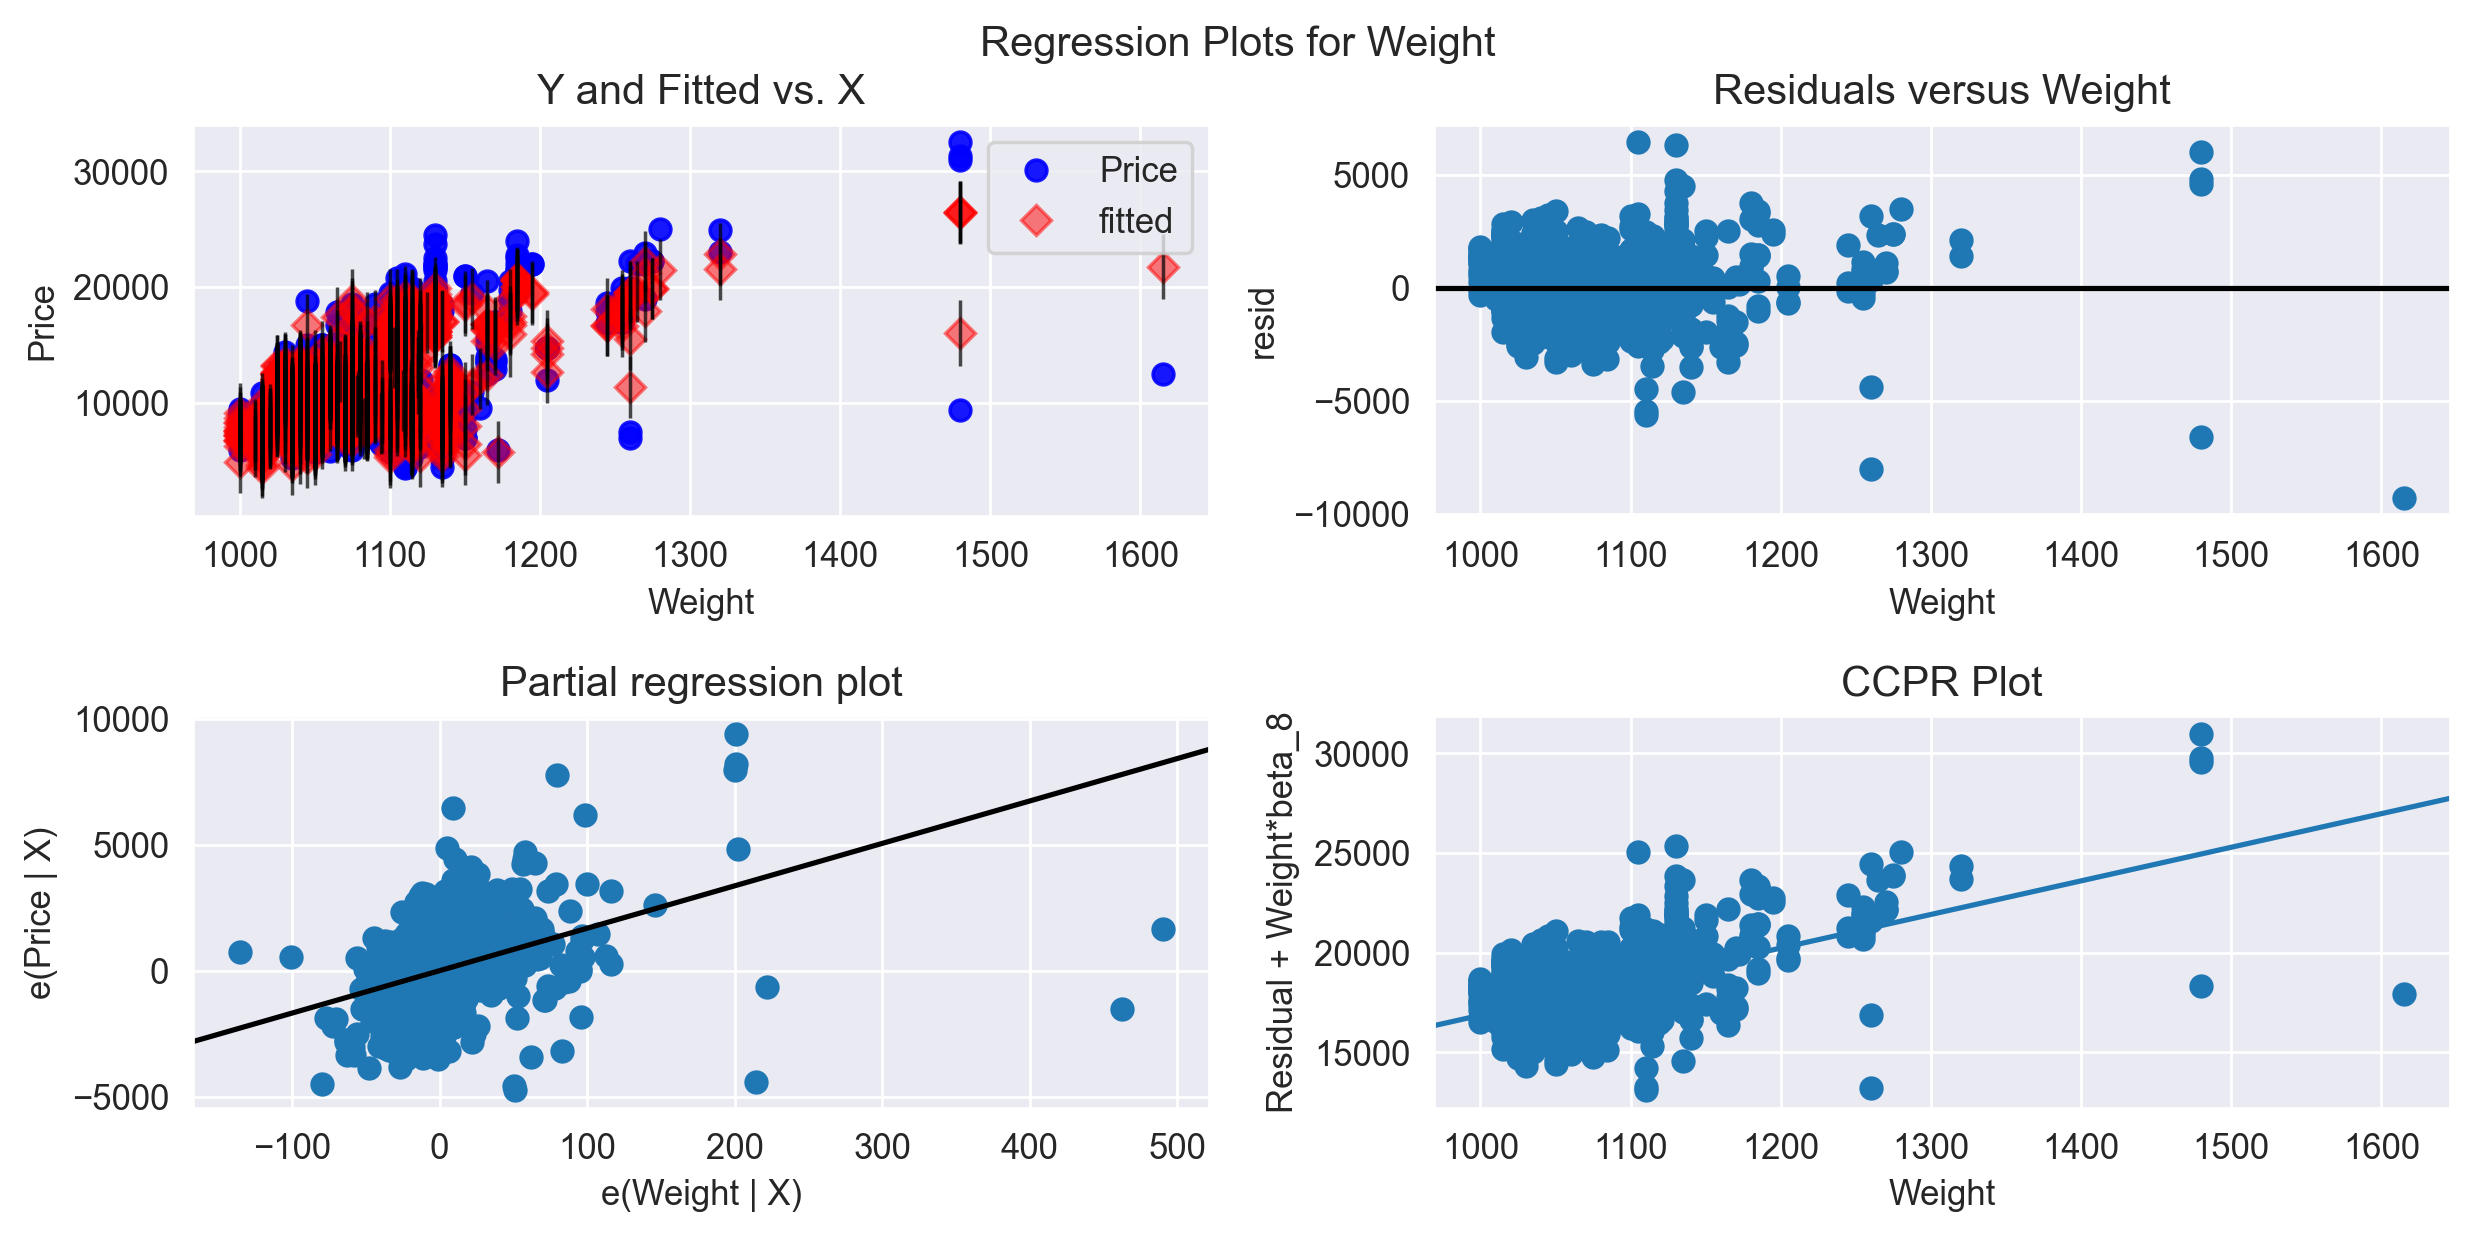

In [52]:
# Weight 
sm.graphics.plot_regress_exog(model_1,'Weight');

> * #### All the Residual Vs Regressor plots have slope value is zero. So, 'Mean of Errors should be zero', condition is followed by model.

* ### <font color = 'blue'> <u> MODEL DELETION DIAGNOSTICS (DETECTING INFLUENCERS) </u>

* ##### <u> Cook's Distance </u>:

    - All Outliers are not Influencers.
    - <u>Influence Data Points</u> are those data points which cause huge change in slope value of Regressor Line. 
    - <u>Outliers</u> are those records where Extreme values present in dependent variable whether don't have extreme data point with respect to independent variable.
    - <u>Leverage Data Points</u> are those records where Extreme values present in independent variable whether don't have extreme data point with respect to dependent variable.

In [53]:
inf = model_1.get_influence()
c,p = inf.cooks_distance

<StemContainer object of 3 artists>

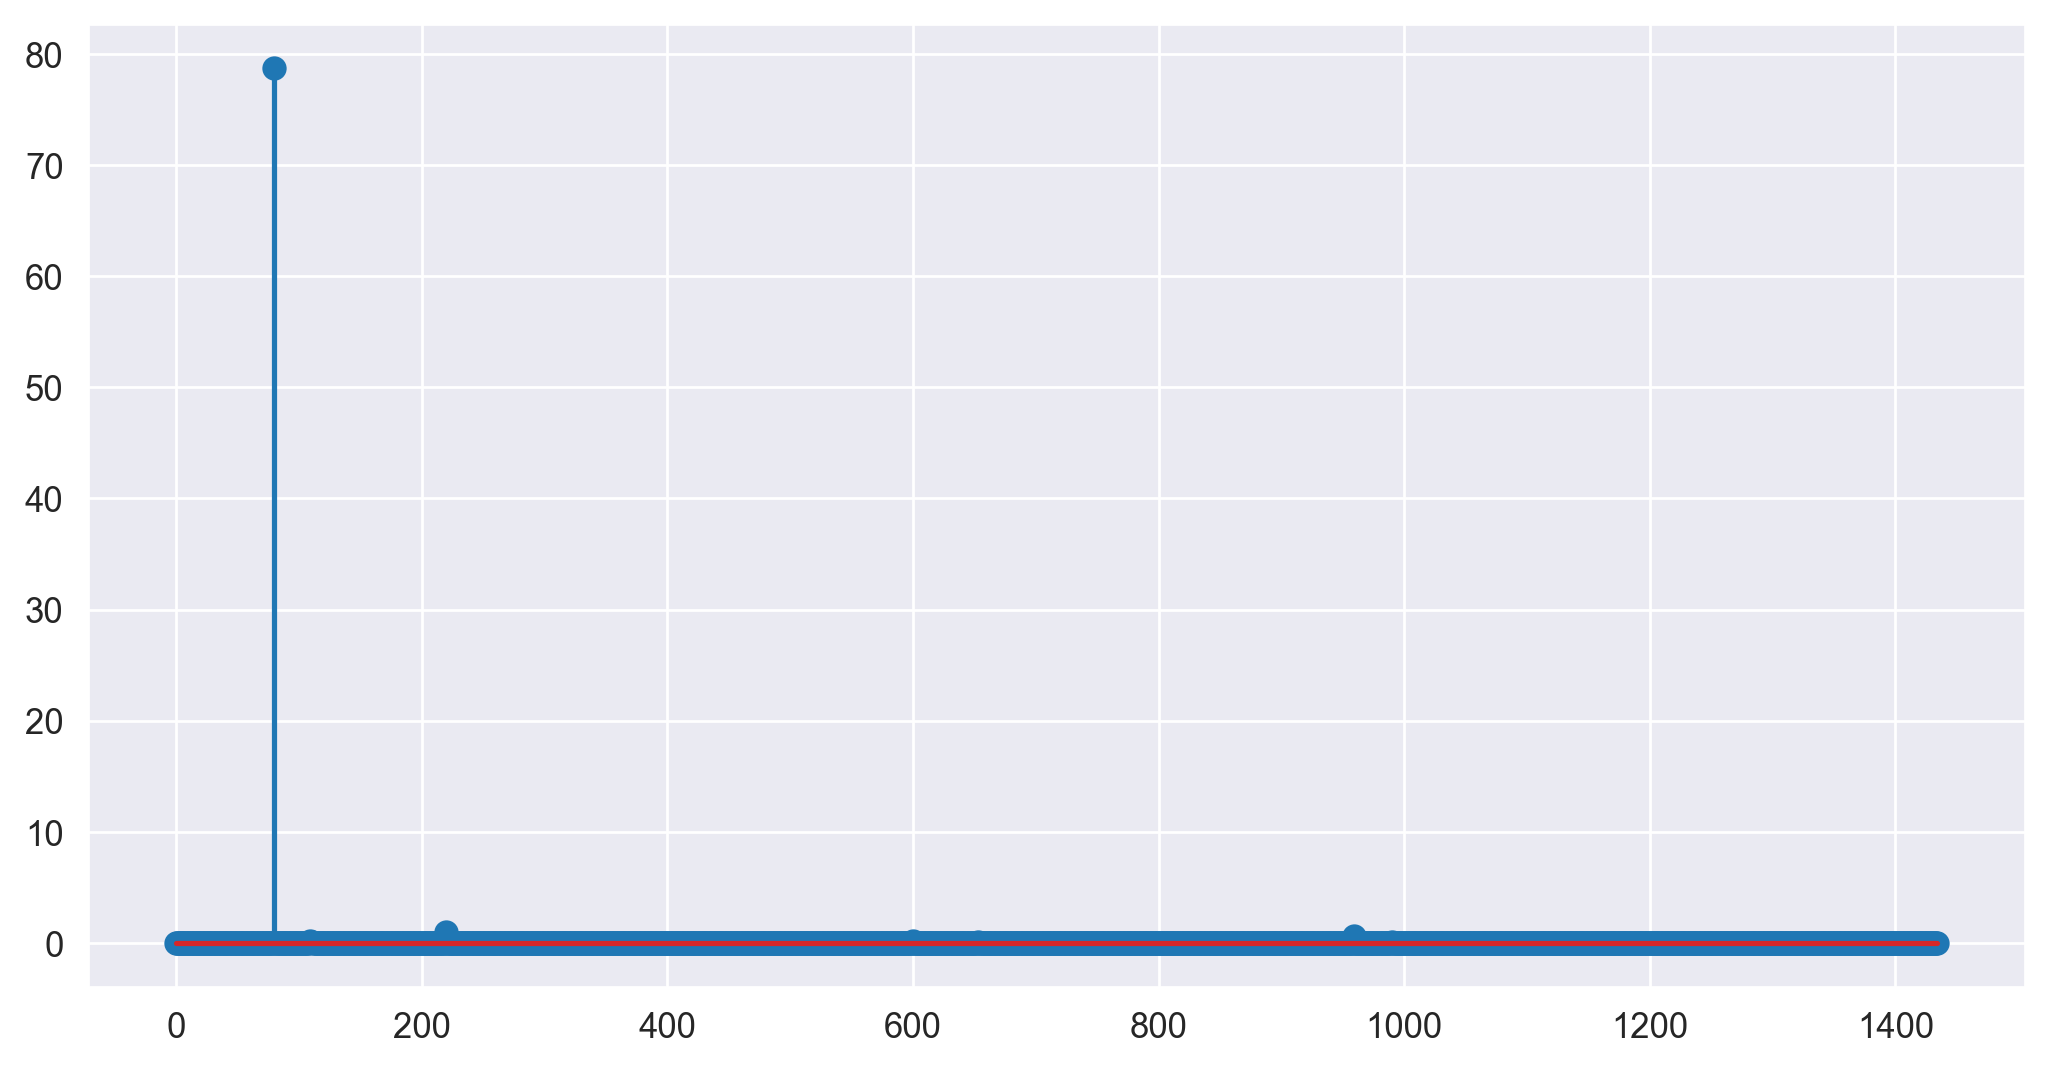

In [54]:
# Cook's Distance Plot
plt.stem(c)

In [55]:
# Maximum value of cooks distance with Index number of Record 
np.argmax(c), np.max(c)

(80, 78.7295058224916)

In [56]:
# Cook's Distance greater than one is generally considered as threshold 
np.where(c>1)

(array([ 80, 220], dtype=int64),)

In [57]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

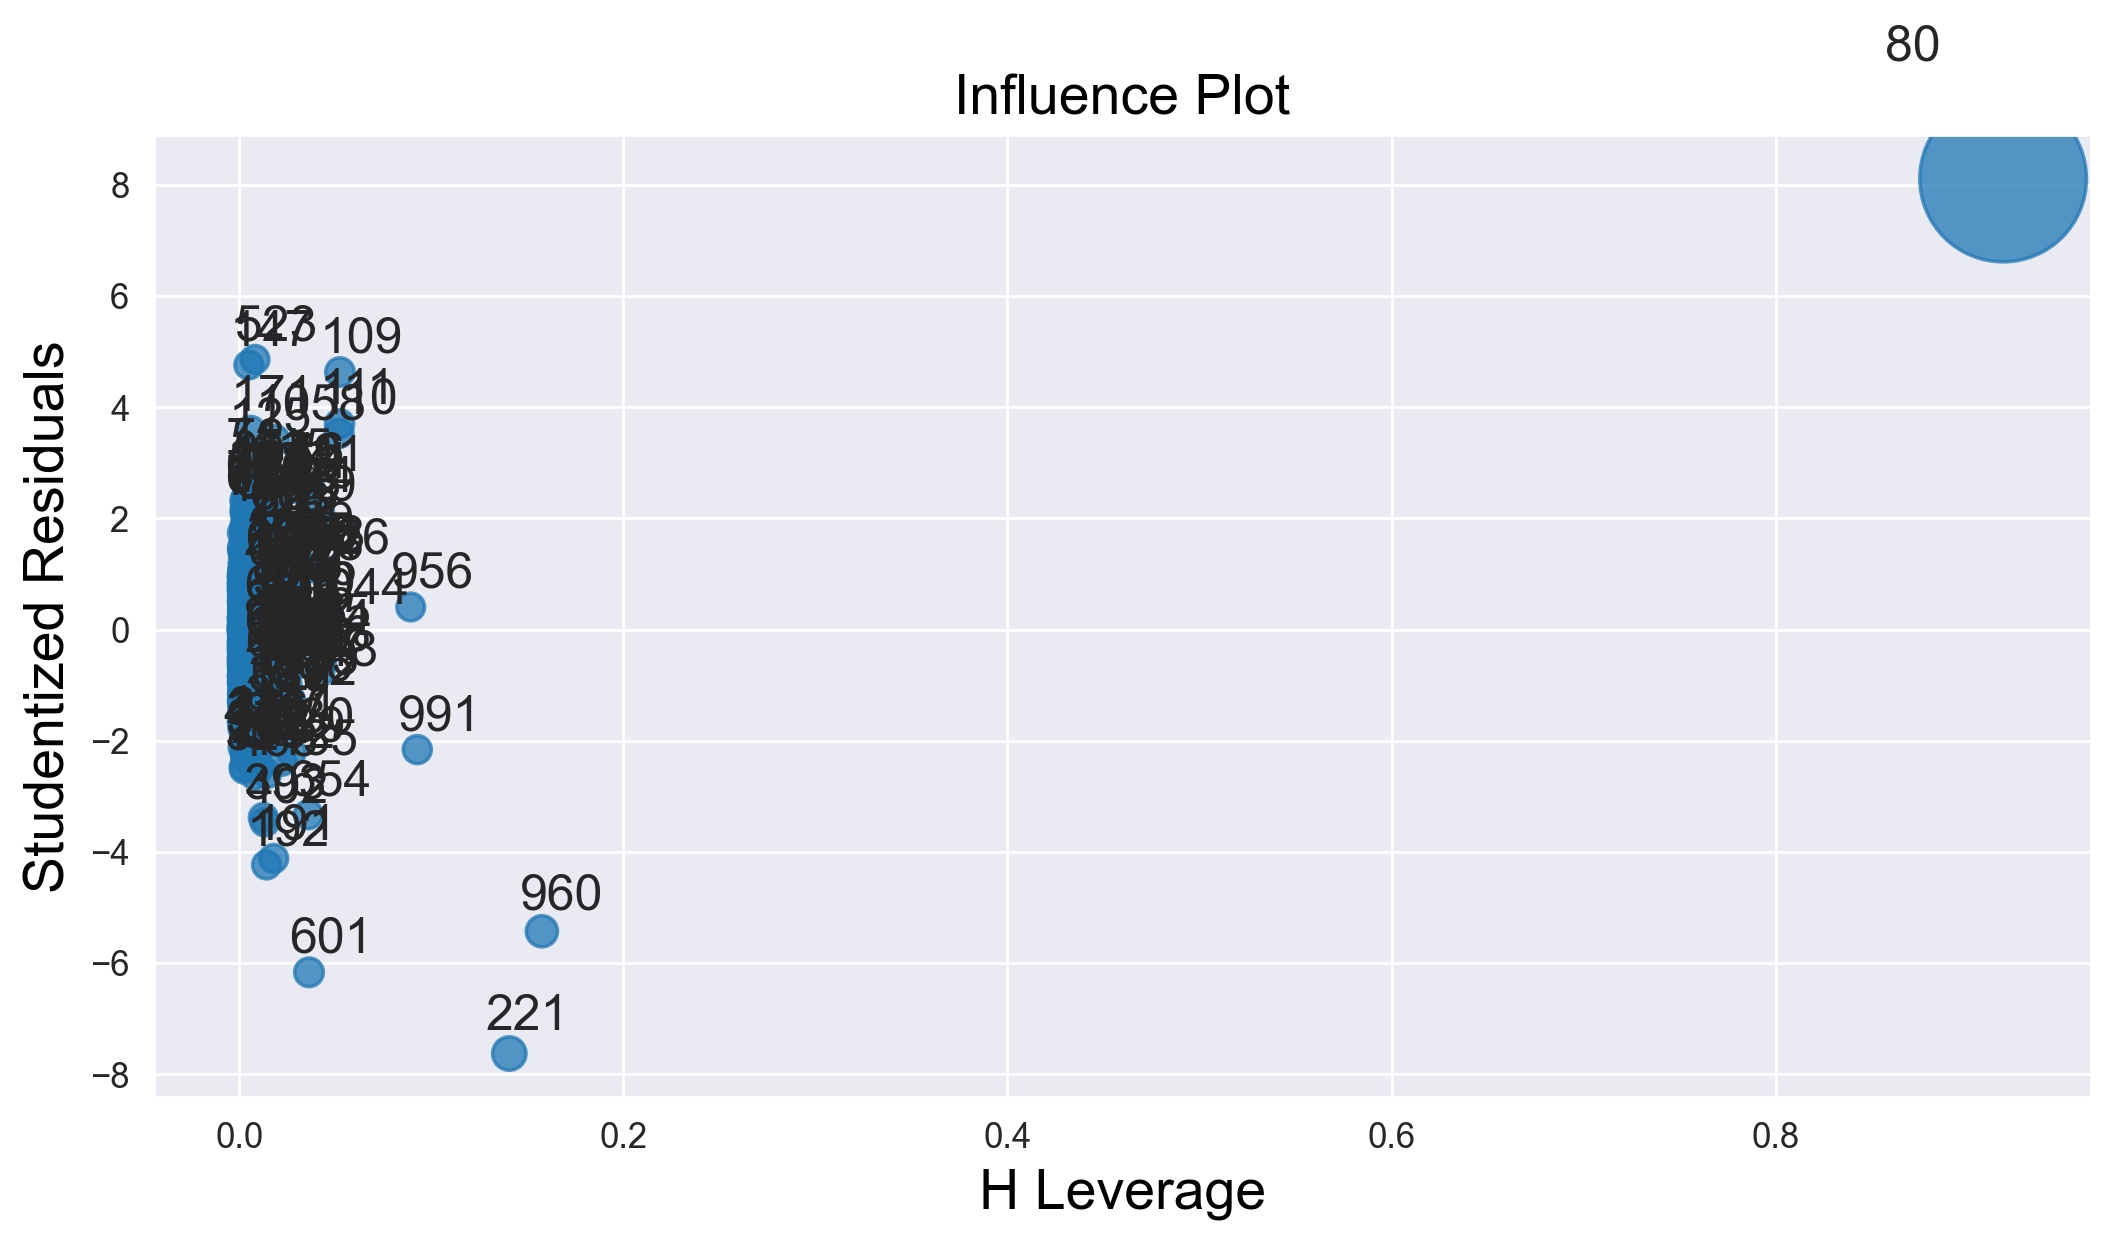

In [58]:
influence_plot(model_1);

In [59]:
# Let's Drop clearly visible Influence Data-Point with Index no 80
df.loc[[80]]

Price  Age     KM   HP     cc  Doors  Gears   QT  Weight
80  18950   25  20019  110  16000      5      5  100    1180

In [60]:
# See why it act as influencer data-Point
df.head(6)

Price  Age     KM  HP    cc  Doors  Gears   QT  Weight
0  13500   23  46986  90  2000      3      5  210    1165
1  13750   23  72937  90  2000      3      5  210    1165
2  13950   24  41711  90  2000      3      5  210    1165
3  14950   26  48000  90  2000      3      5  210    1165
4  13750   30  38500  90  2000      3      5  210    1170
5  12950   32  61000  90  2000      3      5  210    1170

In [61]:
# Due to high "cc" value it becomes influence data-point 

In [62]:
df.drop(index=[80],inplace=True)

In [63]:
df.shape

(1434, 9)

In [64]:
# reset the index
df.reset_index(inplace= True)

In [65]:
df.loc[[80]]

index  Price  Age     KM   HP    cc  Doors  Gears  QT  Weight
80     81  17250   29  20000  110  1600      5      5  85    1115

In [66]:
df.drop(columns=['index'], inplace=True)

In [67]:
df.head(2)

Price  Age     KM  HP    cc  Doors  Gears   QT  Weight
0  13500   23  46986  90  2000      3      5  210    1165
1  13750   23  72937  90  2000      3      5  210    1165

In [68]:
# Again Build the Model with new dataset with same name.

model_1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight', data= df).fit()

In [69]:
# Again calculate cook's distance 
inf = model_1.get_influence()
c,p = inf.cooks_distance

<StemContainer object of 3 artists>

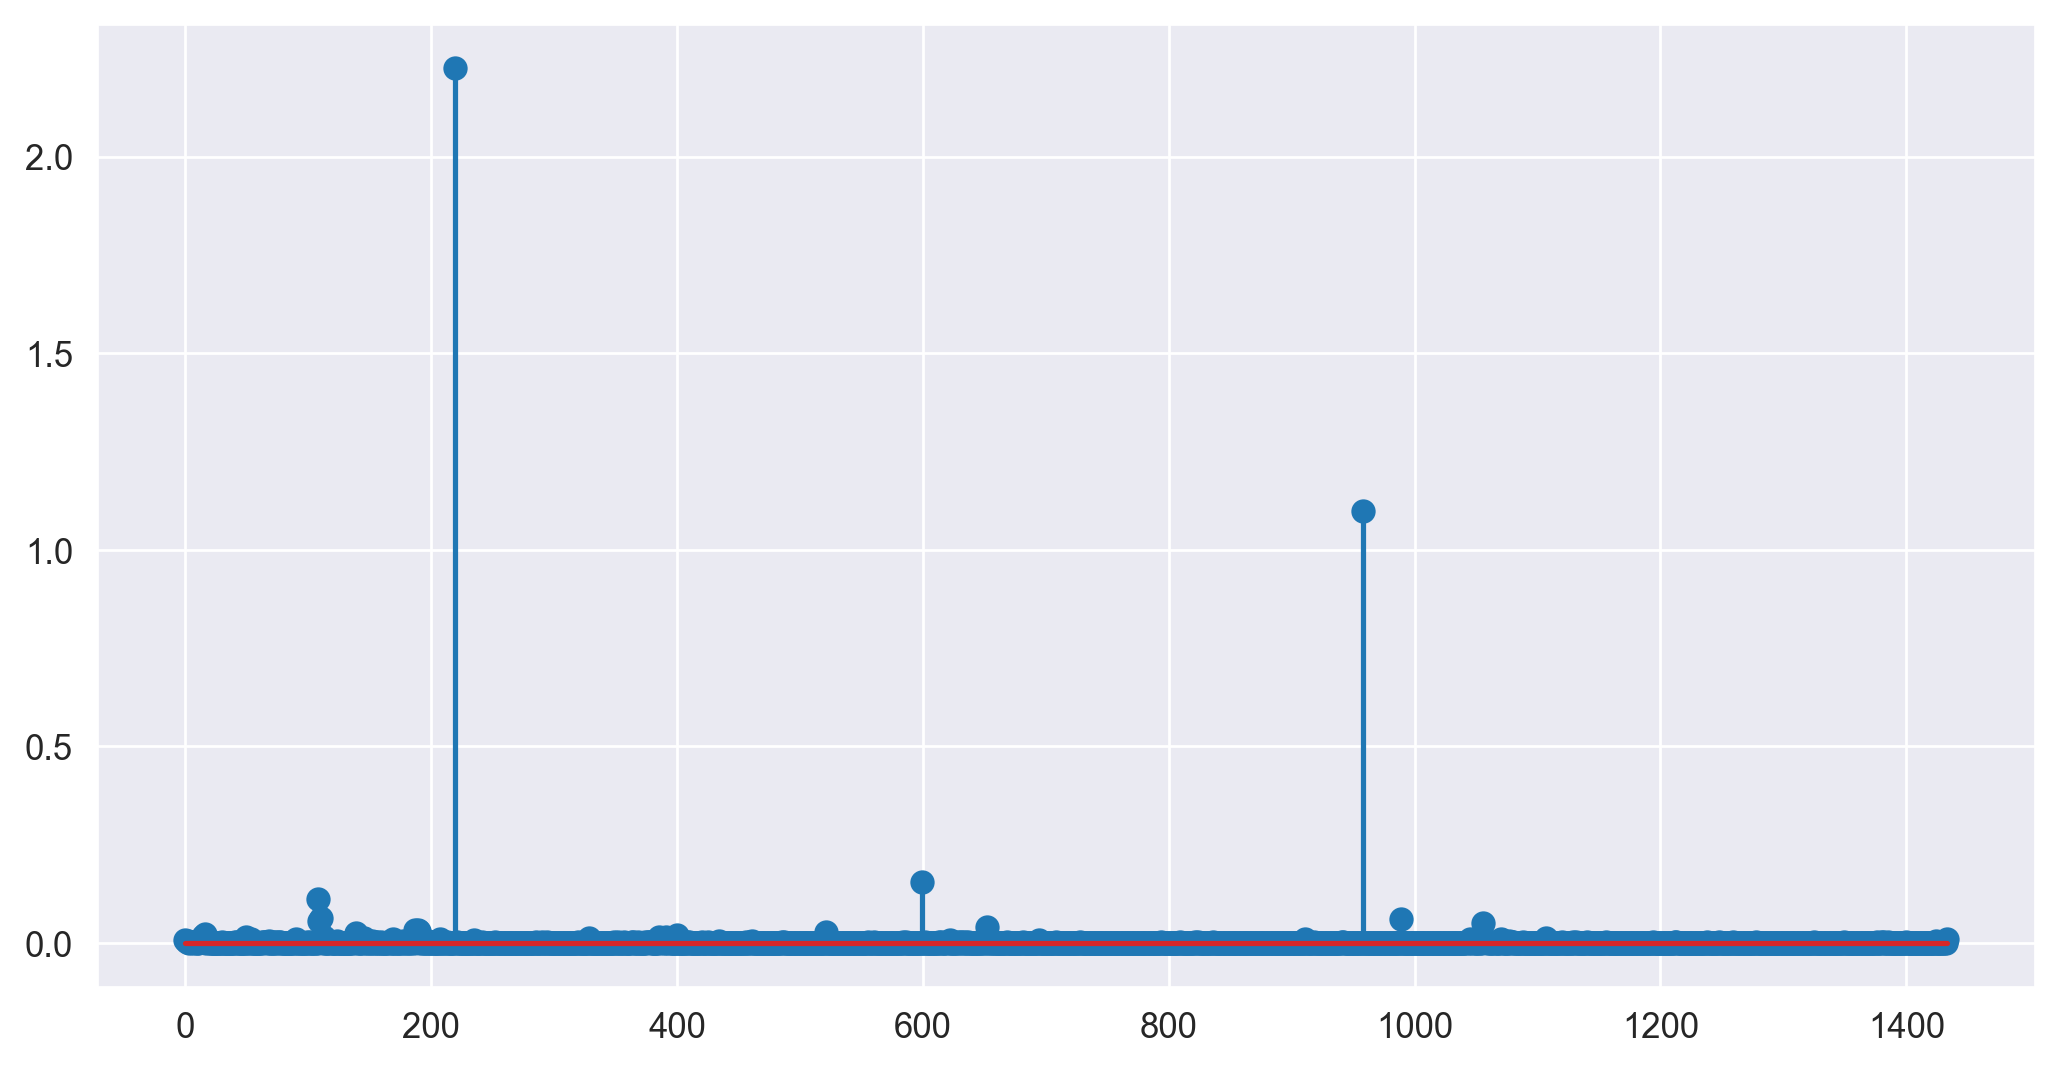

In [70]:
# Plot Cook's Distance 
plt.stem(c)

In [71]:
# Cook's Distance greater than one is generally considered as threshold 
np.where(c>1)

(array([219, 958], dtype=int64),)

In [72]:
# Drop Data Points 219 and 958
df.drop(df.index[[219,958]], axis=0, inplace=True)
df.shape

(1432, 9)

In [73]:
# Again Build the Model with new dataset with same name.

model_1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight', data= df).fit()

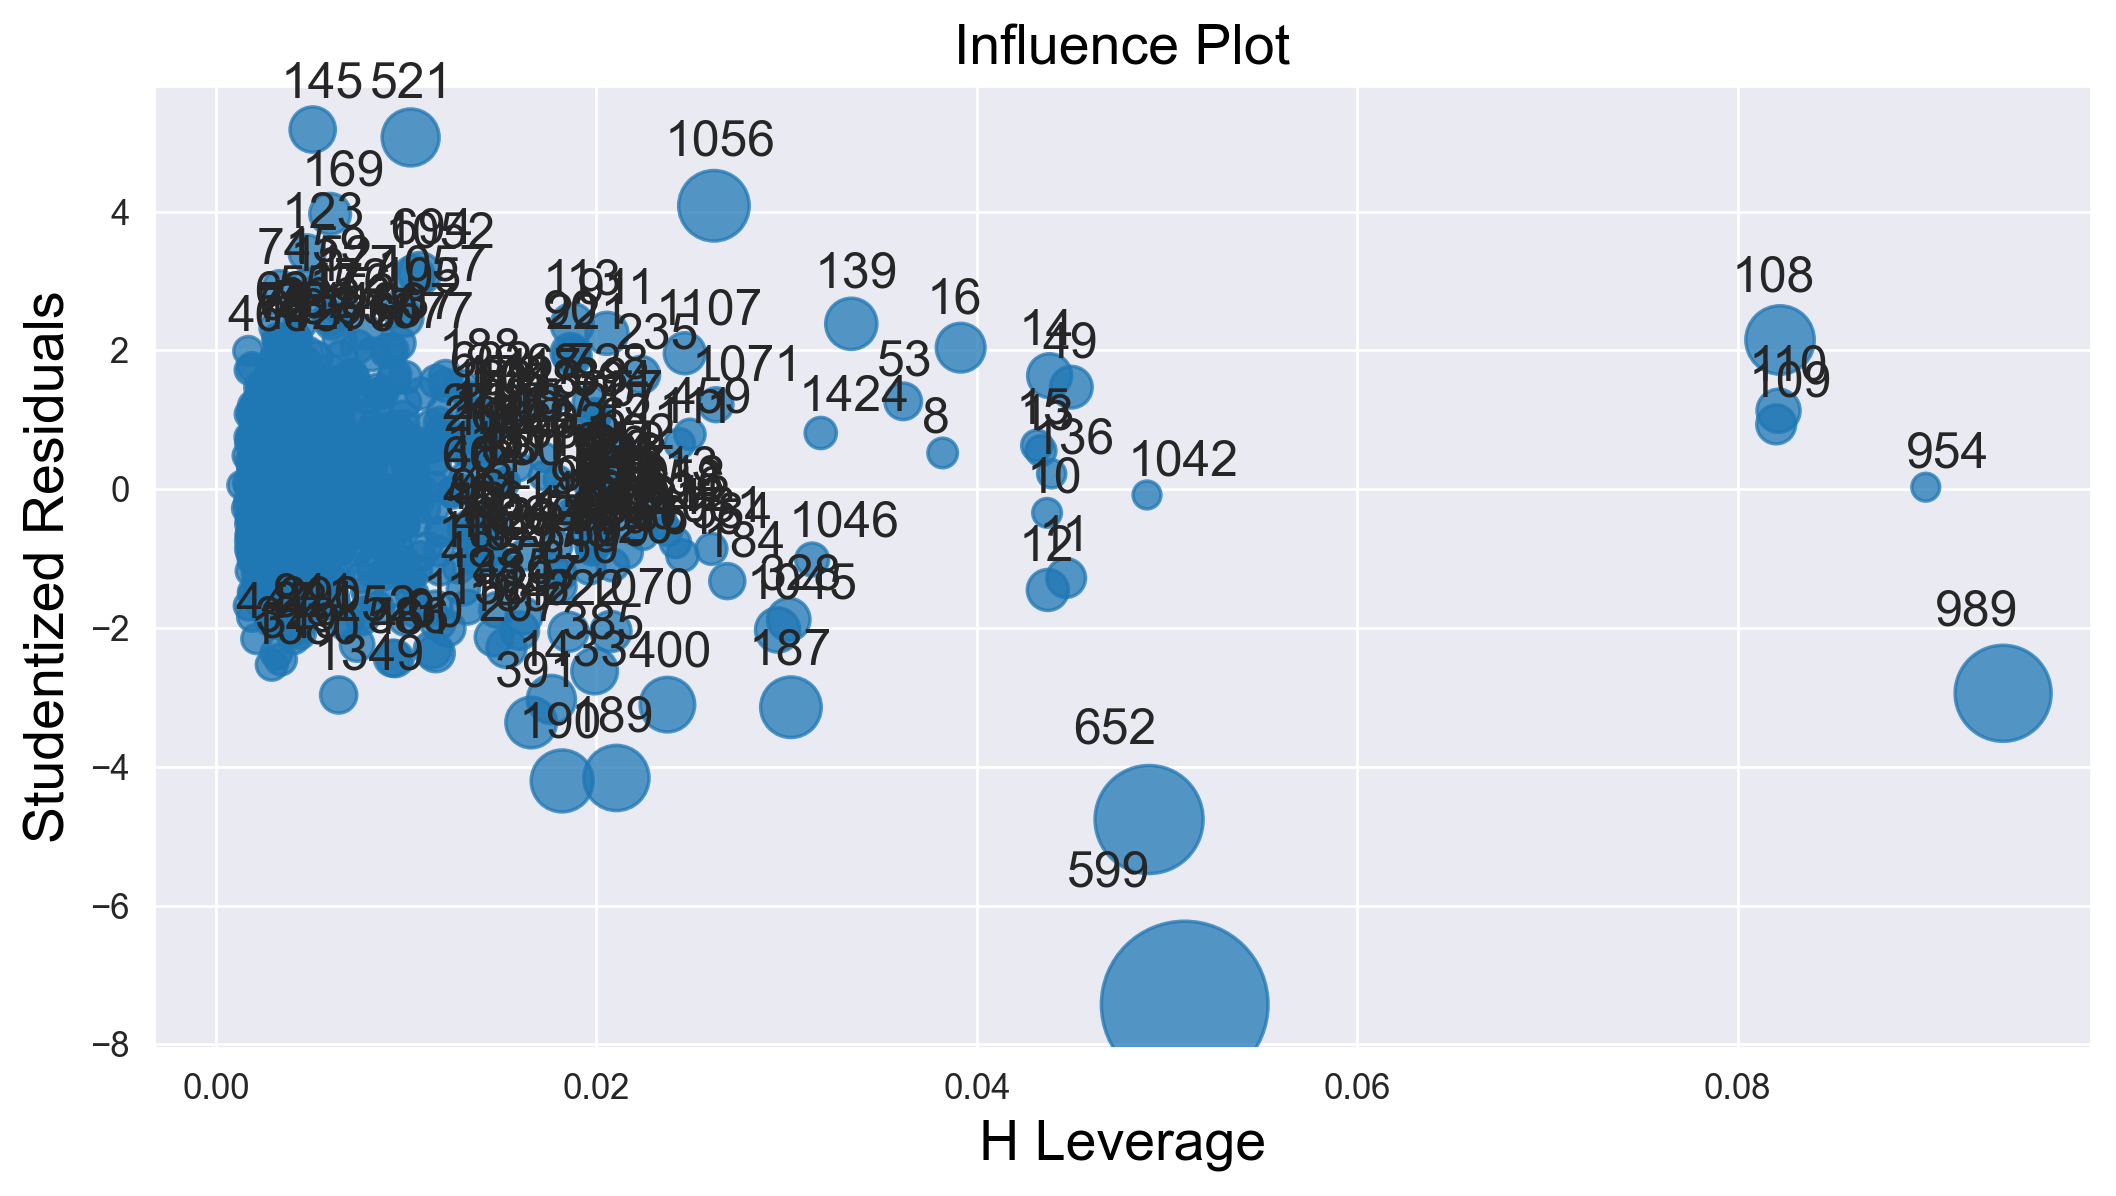

In [74]:
influence_plot(model_1);

In [75]:
# Again calculate cook's distance and Plot it.
inf = model_1.get_influence()
c,p = inf.cooks_distance

<StemContainer object of 3 artists>

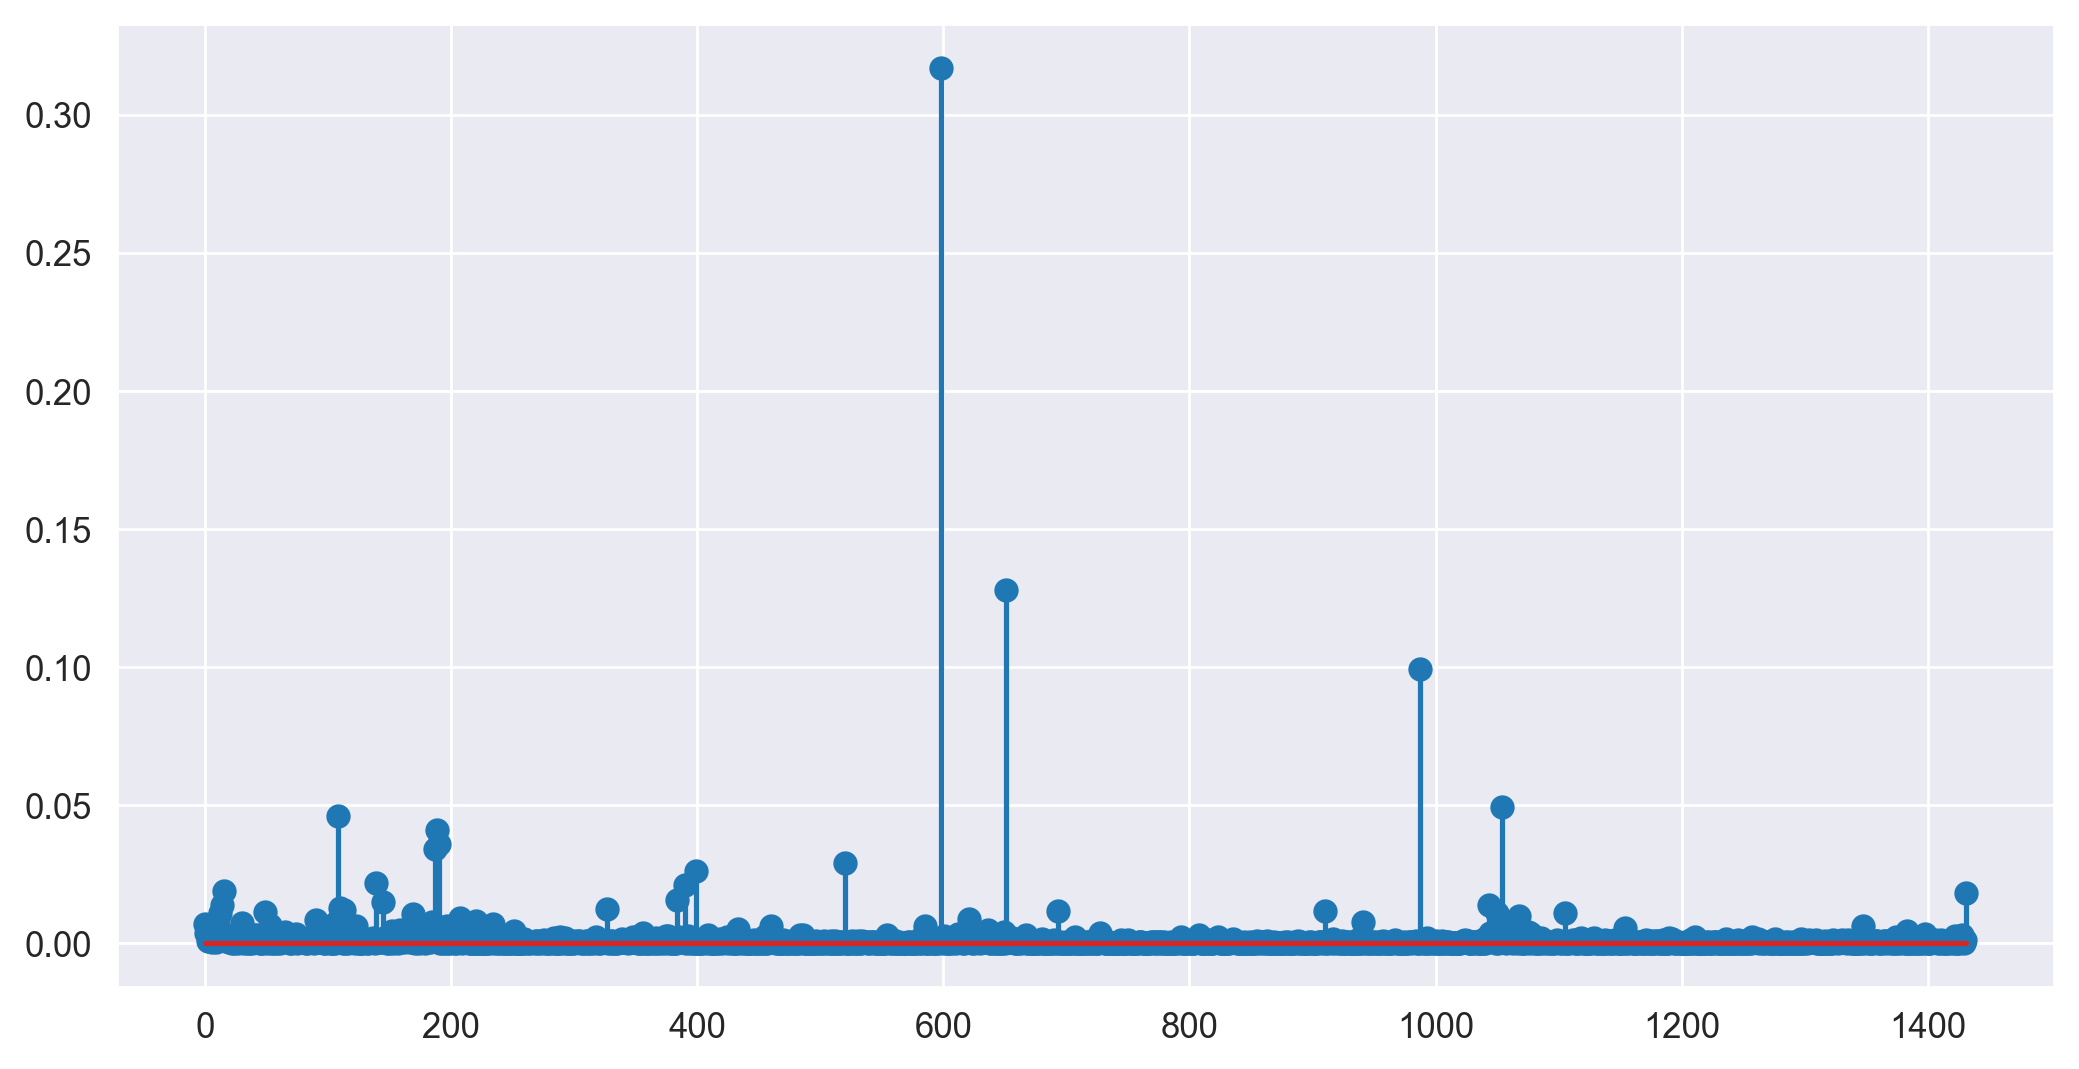

In [76]:
plt.stem(c)

In [77]:
print(f"Maximum cook's distance is:", np.max(c))

Maximum cook's distance is: 0.31689035401452564


> * #### Now all data points have Cook's Distance less than 1. So, We Stop the Diagnostic Process and Finalise the Model.
> * #### Let's check Accuracy of Model

In [78]:
print(f" Final Model Accuracy is:", model_1.rsquared)

 Final Model Accuracy is: 0.8839684606741538


> * #### Model's Accuracy increased by 86% to 88%

* ### <font color = 'blue'> <u> PREDICTING CAR'S PRICES FOR NEW RECORDS </u>

In [79]:
df.head(10)

Price  Age     KM   HP    cc  Doors  Gears   QT  Weight
0  13500   23  46986   90  2000      3      5  210    1165
1  13750   23  72937   90  2000      3      5  210    1165
2  13950   24  41711   90  2000      3      5  210    1165
3  14950   26  48000   90  2000      3      5  210    1165
4  13750   30  38500   90  2000      3      5  210    1170
5  12950   32  61000   90  2000      3      5  210    1170
6  16900   27  94612   90  2000      3      5  210    1245
7  18600   30  75889   90  2000      3      5  210    1245
8  21500   27  19700  192  1800      3      5  100    1185
9  12950   23  71138   69  1900      3      5  185    1105

In [80]:
newdf = pd.DataFrame({
    'Age': [20,27,32],
    'KM' : [49900,69000,88000],
    'HP' : [98,70,86],
    'cc' : [1600, 1990, 1400],
    'Doors': [3, 5, 4],
    'Gears' : [4,5,6],
    'QT' : [100,150,170],
    'Weight' :[1000,1200,1350]
    
})
newdf

Age     KM  HP    cc  Doors  Gears   QT  Weight
0   20  49900  98  1600      3      4  100    1000
1   27  69000  70  1990      5      5  150    1200
2   32  88000  86  1400      4      6  170    1350

In [81]:
newdf['Predicted_Price'] = model_1.predict(newdf)
newdf

Age     KM  HP    cc  Doors  Gears   QT  Weight  Predicted_Price
0   20  49900  98  1600      3      4  100    1000     12340.521411
1   27  69000  70  1990      5      5  150    1200     15326.809263
2   32  88000  86  1400      4      6  170    1350     22539.335001

### Conclusion:
* #### We can predict the Price of Car with 88% of accuracy with selective number of variables only.

<br>
<br>
<br>

> # <u>END</u>
___